# **Analyzing Crime in LA**

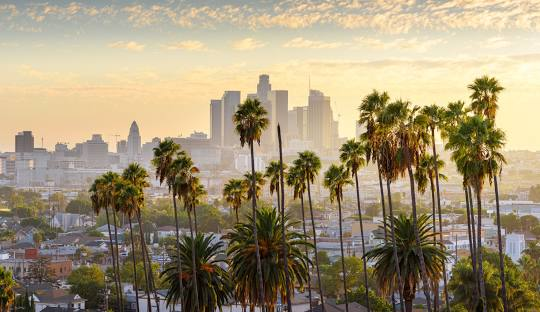

### **Background**
Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs!

However, as with any highely populated city, it isn't always glamarous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing their crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

You are free to use any methodologies that you like in order to produce your insights.

# **About the Data**

The dataset contains records of criminal incidents occurring within the City of Los Angeles starting from the year 2010 to 2023. The data contains 28 columns and can publicly accessed [here](https://https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8/about_data).


In [59]:
#import data
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
#import neccessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno

In [61]:
crimes = pd.read_csv("/content/drive/MyDrive/Crime_Data.csv", parse_dates=["Date Rptd", "DATE OCC"])
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,2020-01-08,2020-01-08,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,2020-01-02,2020-01-01,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,191501505,2020-01-01,2020-01-01,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
3,191921269,2020-01-01,2020-01-01,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
4,200100501,2020-01-02,2020-01-01,30,1,Central,163,1,121,"RAPE, FORCIBLE",...,IC,Invest Cont,121.0,998.0,NaN,NaN,700 S BROADWAY,NaN,34.0452,-118.2534


In [62]:
crimes.tail()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
862901,231606525,2023-03-22,2023-03-22,1000,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,12800 FILMORE ST,NaN,34.2790,-118.4116
862902,231210064,2023-04-12,2023-04-12,1630,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,6100 S VERMONT AV,NaN,33.9841,-118.2915
862903,230115220,2023-07-02,2023-07-01,1,1,Central,154,1,352,PICKPOCKET,...,IC,Invest Cont,352.0,NaN,NaN,NaN,500 S MAIN ST,NaN,34.0467,-118.2485
862904,230906458,2023-03-05,2023-03-05,900,9,Van Nuys,914,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,NaN,NaN,NaN,14500 HARTLAND ST,NaN,34.1951,-118.4487
862905,230319786,2023-11-10,2023-11-09,2300,3,Southwest,395,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,IC,Invest Cont,331.0,NaN,NaN,NaN,4100 S HOBART BL,NaN,34.0091,-118.3078


In [63]:
#check for the number of rows and columns in the dataset
crimes.shape

(862906, 28)

In [64]:
#check for the datatypes
crimes.dtypes

DR_NO                      int64
Date Rptd         datetime64[ns]
DATE OCC          datetime64[ns]
TIME OCC                   int64
AREA                       int64
AREA NAME                 object
Rpt Dist No                int64
Part 1-2                   int64
Crm Cd                     int64
Crm Cd Desc               object
Mocodes                   object
Vict Age                   int64
Vict Sex                  object
Vict Descent              object
Premis Cd                float64
Premis Desc               object
Weapon Used Cd           float64
Weapon Desc               object
Status                    object
Status Desc               object
Crm Cd 1                 float64
Crm Cd 2                 float64
Crm Cd 3                 float64
Crm Cd 4                 float64
LOCATION                  object
Cross Street              object
LAT                      float64
LON                      float64
dtype: object

In [65]:
#check for the summary info
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862906 entries, 0 to 862905
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DR_NO           862906 non-null  int64         
 1   Date Rptd       862906 non-null  datetime64[ns]
 2   DATE OCC        862906 non-null  datetime64[ns]
 3   TIME OCC        862906 non-null  int64         
 4   AREA            862906 non-null  int64         
 5   AREA NAME       862906 non-null  object        
 6   Rpt Dist No     862906 non-null  int64         
 7   Part 1-2        862906 non-null  int64         
 8   Crm Cd          862906 non-null  int64         
 9   Crm Cd Desc     862906 non-null  object        
 10  Mocodes         749241 non-null  object        
 11  Vict Age        862906 non-null  int64         
 12  Vict Sex        757597 non-null  object        
 13  Vict Descent    757584 non-null  object        
 14  Premis Cd       862886 non-null  flo

In [66]:
#check for the summary statistics
crimes.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,8.629060e+05,862906.000000,862906.000000,862906.000000,862906.000000,862906.000000,862906.000000,862886.000000,299647.000000,862896.000000,58447.000000,1742.000000,57.000000,862906.000000,862906.000000
mean,1.961506e+08,1345.993386,10.860006,1132.317284,1.419721,501.994537,29.941419,309.283723,365.876218,501.778446,957.486697,981.040184,988.508772,34.026953,-118.190290
std,4.569677e+07,651.250248,6.138097,613.639293,0.493514,209.151447,21.510678,215.650185,121.857935,208.976666,111.831431,62.503758,29.758626,1.271577,4.400756
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-12.000000,101.000000,101.000000,110.000000,210.000000,310.000000,821.000000,0.000000,-118.766800
25%,1.620117e+08,900.000000,6.000000,625.000000,1.000000,330.000000,14.000000,102.000000,400.000000,330.000000,998.000000,998.000000,998.000000,34.010900,-118.430500
50%,2.201122e+08,1425.000000,11.000000,1162.000000,1.000000,442.000000,31.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.000000,34.059000,-118.320500
75%,2.311107e+08,1900.000000,16.000000,1655.000000,2.000000,626.000000,45.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.000000,34.166700,-118.273900
max,9.102204e+08,2359.000000,21.000000,2198.000000,2.000000,956.000000,99.000000,976.000000,516.000000,956.000000,999.000000,999.000000,999.000000,34.541800,0.000000


In [67]:
# check for the summary stats for string columns
crimes.describe(include=['O'])

,AREA NAME,Crm Cd Desc,Mocodes,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status,Status Desc,LOCATION,Cross Street
count,862906,862906,749241,757597,757584,862398,299647,862905,862906,862906,135461
unique,21,139,231732,5,20,311,76,7,6,62632,9034
top,Central,VEHICLE - STOLEN,0344,M,H,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,800 N ALAMEDA ST,BROADWAY
freq,57483,84647,50714,363593,273497,213210,164900,703312,703312,1578,2450


In [68]:
# check for null values
crimes.isnull().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           113665
Vict Age               0
Vict Sex          105309
Vict Descent      105322
Premis Cd             20
Premis Desc          508
Weapon Used Cd    563259
Weapon Desc       563259
Status                 1
Status Desc            0
Crm Cd 1              10
Crm Cd 2          804459
Crm Cd 3          861164
Crm Cd 4          862849
LOCATION               0
Cross Street      727445
LAT                    0
LON                    0
dtype: int64

In [69]:
# check for duplicate rows
duplicate_rows = crimes[crimes.duplicated(keep=False)]
print(duplicate_rows)


            DR_NO  Date Rptd   DATE OCC  TIME OCC  AREA    AREA NAME  \
425909  231515059 2023-09-19 2023-09-19      1030    15  N Hollywood   
425911  231012230 2023-08-08 2023-08-04      1200    10  West Valley   
425913  232005166 2023-01-21 2023-01-21        40    20      Olympic   
425916  231222087 2023-10-28 2023-10-27      2020    12  77th Street   
425918  232013458 2023-07-26 2023-07-23       320    20      Olympic   
...           ...        ...        ...       ...   ...          ...   
862898  231510379 2023-05-29 2023-05-25      1100    15  N Hollywood   
862899  231110961 2023-07-09 2023-07-06      1200    11    Northeast   
862900  231604807 2023-01-27 2023-01-26      1800    16     Foothill   
862901  231606525 2023-03-22 2023-03-22      1000    16     Foothill   
862902  231210064 2023-04-12 2023-04-12      1630    12  77th Street   

        Rpt Dist No  Part 1-2  Crm Cd  \
425909         1549         1     230   
425911         1023         1     420   
425913      

## Data Cleaning

In [70]:
#Remove duplicated rows
crimes.drop_duplicates(inplace=True)
crimes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 737947 entries, 0 to 862905
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DR_NO           737947 non-null  int64         
 1   Date Rptd       737947 non-null  datetime64[ns]
 2   DATE OCC        737947 non-null  datetime64[ns]
 3   TIME OCC        737947 non-null  int64         
 4   AREA            737947 non-null  int64         
 5   AREA NAME       737947 non-null  object        
 6   Rpt Dist No     737947 non-null  int64         
 7   Part 1-2        737947 non-null  int64         
 8   Crm Cd          737947 non-null  int64         
 9   Crm Cd Desc     737947 non-null  object        
 10  Mocodes         643737 non-null  object        
 11  Vict Age        737947 non-null  int64         
 12  Vict Sex        650860 non-null  object        
 13  Vict Descent    650850 non-null  object        
 14  Premis Cd       737929 non-null  flo

In [71]:
#Check for nulls
missing_percentage = (crimes.isnull().mean() * 100).round(2)
print(missing_percentage)


DR_NO              0.00
Date Rptd          0.00
DATE OCC           0.00
TIME OCC           0.00
AREA               0.00
AREA NAME          0.00
Rpt Dist No        0.00
Part 1-2           0.00
Crm Cd             0.00
Crm Cd Desc        0.00
Mocodes           12.77
Vict Age           0.00
Vict Sex          11.80
Vict Descent      11.80
Premis Cd          0.00
Premis Desc        0.05
Weapon Used Cd    65.19
Weapon Desc       65.19
Status             0.00
Status Desc        0.00
Crm Cd 1           0.00
Crm Cd 2          93.23
Crm Cd 3          99.81
Crm Cd 4          99.99
LOCATION           0.00
Cross Street      83.98
LAT                0.00
LON                0.00
dtype: float64


<Axes: >

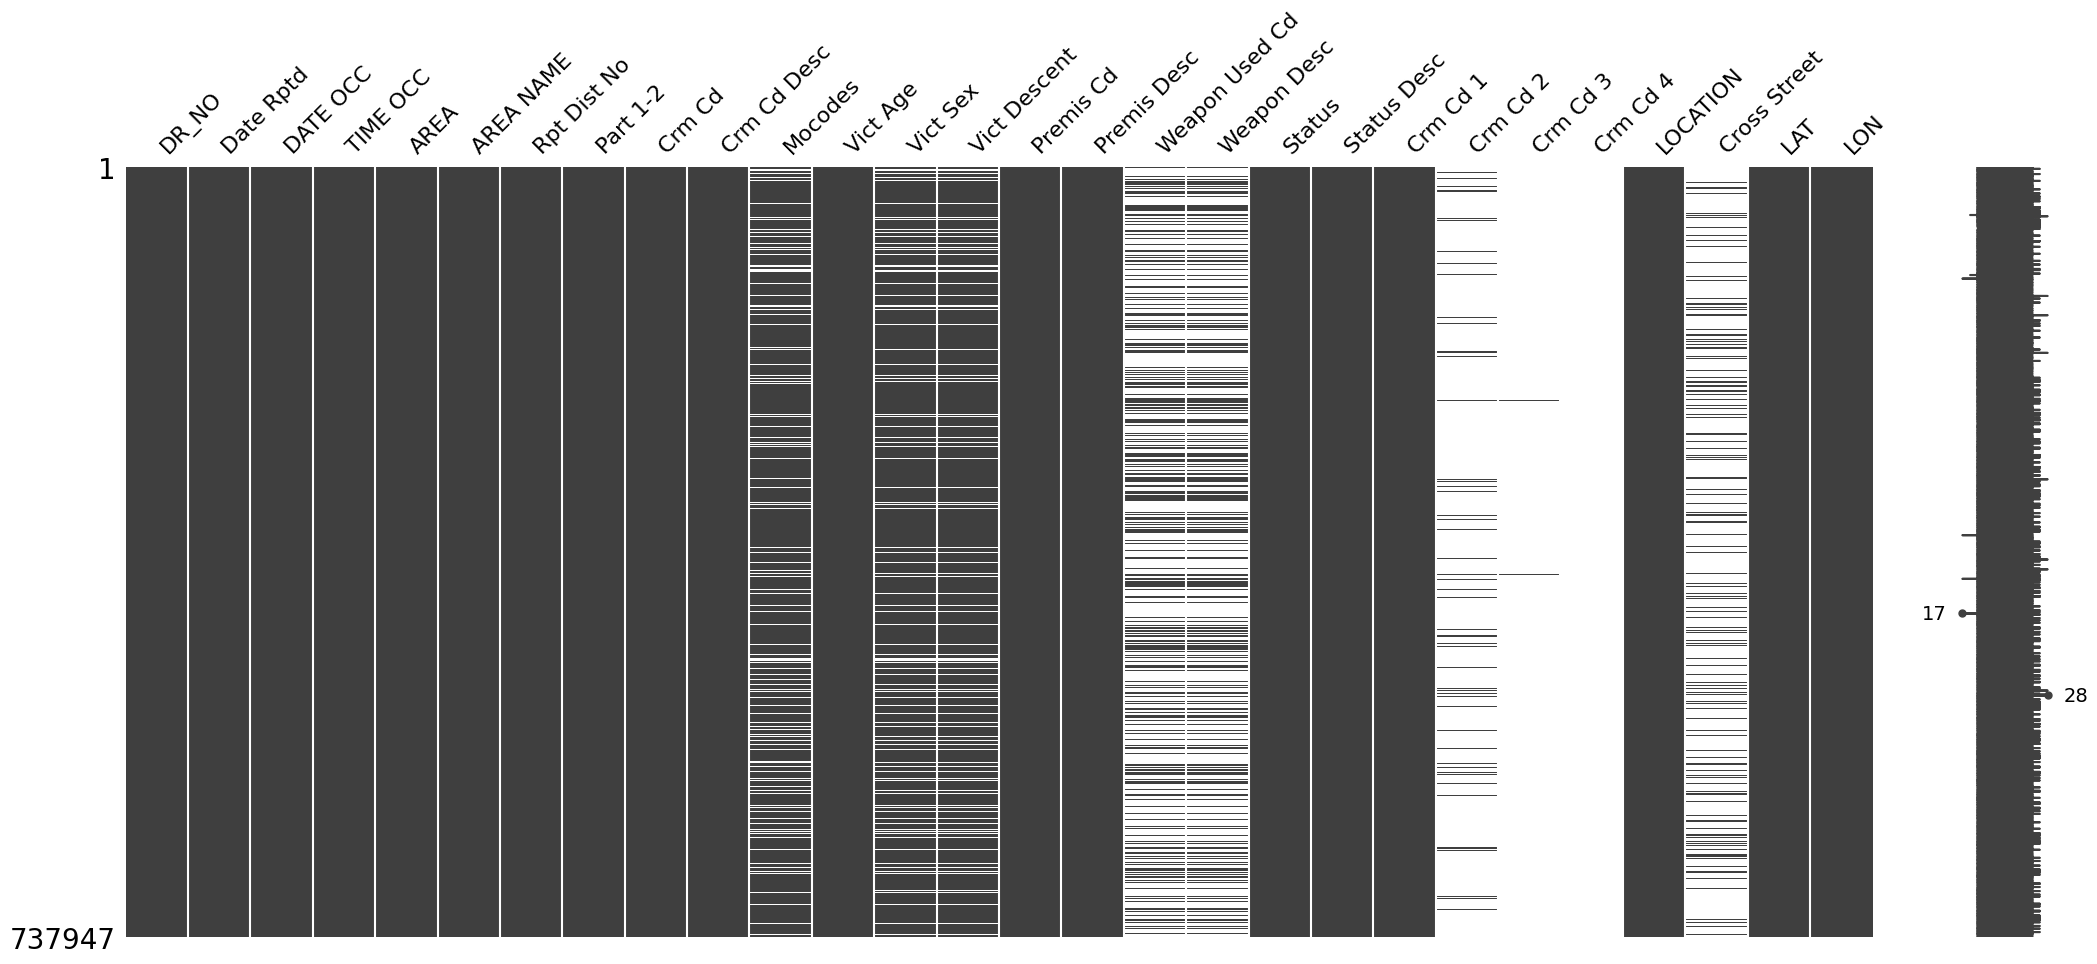

In [72]:
#Visualize the null values
msno.matrix(crimes)

I used missingno liberary to visualize the number of misssing values in each column to check for patterns created by these null values.


*   From the matrix plot, there seems to be a noteworthy relationship between the missing data in the 'vict_sex' and 'vict_descent' columns. This suggests that the missing data is likely not random, potentially indicating that victims either declined to disclose this information or it wasn't recorded.
*   A similar relationship is observed between the 'weapon_used' and 'weapon_desc' columns. Understandably, if information on the weapon used is absent, it follows that a detailed description would also be missing.
*   Cm Cd 2, Cm Cd 3 and Cm Cd 4 columns have the highest missing values.



In [73]:
# drop columns crm cd 2, crm cd 3, crm cd 4
columns_to_drop = ['Weapon Used Cd','Mocodes', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Status']

crimes.drop(columns=columns_to_drop, inplace=True)



I dropped the Cm Cd 2, Cm Cd 3 and Cm Cd 4 columns because they were irrelevant columns and were filled with over 90% null values.



In [74]:
# Check for the columns
crimes.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Vict Age',
       'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc', 'Weapon Desc',
       'Status Desc', 'Crm Cd 1', 'LOCATION', 'Cross Street', 'LAT', 'LON'],
      dtype='object')

In [75]:
# investigate the victim descent column
crimes['Vict Descent'].value_counts()

H    233502
W    159531
B    109563
X     60521
O     59588
A     16366
K      3961
C      2531
F      2384
J       848
I       639
V       638
Z       304
P       193
U        97
D        54
G        49
L        41
S        38
-         2
Name: Vict Descent, dtype: int64

In [76]:
# Replace the '-' values with X (Unknown)
crimes['Vict Descent'] = crimes['Vict Descent'].replace('-', 'X')

In [77]:
null_count = crimes['Vict Descent'].isnull().sum()

# Count the unique variables in the 'Vict Descent' column
unique_count = crimes['Vict Descent'].nunique()

# Display counts of null values
print(f"Null values count: {null_count}")

# Display the frequency of each unique variable
unique_value_counts = crimes['Vict Descent'].value_counts()
print("\nFrequency of unique variables:")
print(unique_value_counts)

Null values count: 87097

Frequency of unique variables:
H    233502
W    159531
B    109563
X     60523
O     59588
A     16366
K      3961
C      2531
F      2384
J       848
I       639
V       638
Z       304
P       193
U        97
D        54
G        49
L        41
S        38
Name: Vict Descent, dtype: int64


In [78]:
# Replace null values in the 'Vict Descent' column with 'X'
crimes['Vict Descent'].fillna('X', inplace=True)

In [79]:
# Map a description to the Vict Descent
victim_descent_map = {
    'A': 'Other Asian',
    'B': 'Black',
    'C': 'Chinese',
    'D': 'Cambodian',
    'F': 'Filipino',
    'G': 'Guamanian',
    'H': 'Hispanic/Latin/Mexican',
    'I': 'American Indian/Alaskan Native',
    'J': 'Japanese',
    'K': 'Korean',
    'L': 'Laotian',
    'O': 'Other',
    'P': 'Pacific Islander',
    'S': 'Samoan',
    'U': 'Hawaiian',
    'V': 'Vietnamese',
    'W': 'White',
    'X': 'Unknown',
    'Z': 'Asian Indian'
}

# Create a function to map descriptions to categories
def map_vict_descent(description):
    return victim_descent_map.get(description, 'Unknown')  # Default 'Other' for unmatched descriptions

# Apply the mapping function to create the 'Vict Descent Description' column
crimes['Vict Descent Description'] = crimes['Vict Descent'].map(map_vict_descent)


In [80]:
# investigate the victim sex column
count_nulls = crimes['Vict Sex'].isnull().sum()

# Display counts of null values
print(f"Null values count: {count_nulls}")

# Display the frequency of each unique variable
unique_value_counts = crimes['Vict Sex'].value_counts()
print("\nFrequency of unique variables:")
print(unique_value_counts)

Null values count: 87087

Frequency of unique variables:
M    312759
F    284037
X     54013
H        49
-         2
Name: Vict Sex, dtype: int64


In [81]:
# Replace the '-' values with X (Unknown)
crimes['Vict Sex'] = crimes['Vict Sex'].replace('-', 'X')

# Replace the 'H' values with X (Unknown)
crimes['Vict Sex'] = crimes['Vict Sex'].replace('H', 'X')

# Replace null values in the 'Vict Sex' column with 'X'
crimes['Vict Sex'].fillna('X', inplace=True)

In [82]:
crimes['Vict Age'].value_counts()

 0     166361
 30     16427
 29     16170
 28     15957
 27     15726
        ...  
-6          5
-9          3
-8          3
-12         1
-11         1
Name: Vict Age, Length: 111, dtype: int64

In [83]:
unknown_age = crimes[crimes['Vict Age'] == 0]
unknown_age[['Vict Age', 'Vict Sex', 'Vict Descent']].head(50)


,Vict Age,Vict Sex,Vict Descent
6,0,X,X
11,0,X,X
21,0,X,X
22,0,M,W
39,0,X,X
40,0,X,X
48,0,X,X
49,0,X,X
50,0,X,X
54,0,X,X


In [84]:
# Find rows where 'Vict Age' is negative
negative_age_indices = crimes[crimes['Vict Age'] < 0].index

# Calculate the average age of non-negative values
average_age = crimes[crimes['Vict Age'] >= 0]['Vict Age'].mean()

# Replace negative ages with the calculated average age
crimes.loc[negative_age_indices, 'Vict Age'] = average_age

In [85]:
# check for the frequency of each age
crimes['Vict Age'].value_counts()

0.0     166361
30.0     16427
29.0     16170
28.0     15957
27.0     15726
         ...  
94.0        95
96.0        78
95.0        76
97.0        49
98.0        40
Name: Vict Age, Length: 100, dtype: int64

In [86]:
# investigate the Weapon Desc column
count_null = crimes['Weapon Desc'].isnull().sum()

# Count the unique variables in the 'Vict Descent' column
unique_count = crimes['Weapon Desc'].nunique()

# Display counts of null values
print(f"Null values count: {count_null}")
# Display counts of null values
print(f"Unique values count: {unique_count}")

# Display the frequency of each unique variable
unique_value_count = crimes['Weapon Desc'].value_counts()
print("\nFrequency of unique variables:")
print(unique_value_count)

Null values count: 481059
Unique values count: 76

Frequency of unique variables:
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    142334
UNKNOWN WEAPON/OTHER WEAPON                        26631
VERBAL THREAT                                      19617
HAND GUN                                           15318
SEMI-AUTOMATIC PISTOL                               5106
                                                   ...  
ANTIQUE FIREARM                                       10
RELIC FIREARM                                          9
MARTIAL ARTS WEAPONS                                   6
MAC-10 SEMIAUTOMATIC ASSAULT WEAPON                    2
HECKLER & KOCH 91 SEMIAUTOMATIC ASSAULT RIFLE          2
Name: Weapon Desc, Length: 76, dtype: int64


In [87]:
# Check for the unique variables in the weapon description column
crimes['Weapon Desc'].unique()

array(['STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)',
       'UNKNOWN WEAPON/OTHER WEAPON', nan, 'ROCK/THROWN OBJECT',
       'VERBAL THREAT', 'FOLDING KNIFE', 'BLUNT INSTRUMENT', 'BOTTLE',
       'OTHER CUTTING INSTRUMENT', 'HAND GUN', 'PHYSICAL PRESENCE',
       'VEHICLE', 'SCISSORS', 'STICK', 'MACHETE', 'OTHER KNIFE',
       'KNIFE WITH BLADE 6INCHES OR LESS', 'FIRE', 'GLASS',
       'SIMULATED GUN', 'KNIFE WITH BLADE OVER 6 INCHES IN LENGTH',
       'DEMAND NOTE', 'BOMB THREAT', 'PIPE/METAL PIPE', 'ICE PICK',
       'UNKNOWN FIREARM', 'MACE/PEPPER SPRAY',
       'BELT FLAILING INSTRUMENT/CHAIN',
       'UNKNOWN TYPE CUTTING INSTRUMENT', 'SEMI-AUTOMATIC PISTOL',
       'SCREWDRIVER', 'KITCHEN KNIFE', 'AIR PISTOL/REVOLVER/RIFLE/BB GUN',
       'BRASS KNUCKLES', 'HAMMER', 'REVOLVER', 'SWITCH BLADE', 'CLUB/BAT',
       'STUN GUN', 'AXE', 'RIFLE', 'ASSAULT WEAPON/UZI/AK47/ETC',
       'OTHER FIREARM', 'SHOTGUN', 'ANTIQUE FIREARM', 'FIXED OBJECT',
       'SEMI-AUTOMATIC RIFLE', 'SYRIN

In [88]:
# Replace null values in the 'Weapon Desc' column with 'UNKNOWN WEAPON'
crimes['Weapon Desc'].fillna('UNKNOWN WEAPON', inplace=True)

In [89]:
# Create a map
weapon_mapping = {
    'STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)': 'BODILY FORCE',
    'UNKNOWN WEAPON/OTHER WEAPON': 'UNKNOWN WEAPON',
    'ROCK/THROWN OBJECT': 'THROWN OBJECT',
    'VERBAL THREAT': 'THREAT',
    'FOLDING KNIFE': 'CUTTING INSTRUMENT',
    'BLUNT INSTRUMENT': 'BLUNT INSTRUMENT',
    'BOTTLE': 'BOTTLE',
    'OTHER CUTTING INSTRUMENT': 'CUTTING INSTRUMENT',
    'HAND GUN': 'FIREARM',
    'PHYSICAL PRESENCE': 'BODILY FORCE',
    'VEHICLE': 'VEHICLE',
    'SCISSORS': 'SHARP OBJECT',
    'STICK': 'BLUNT INSTRUMENT',
    'MACHETE': 'CUTTING INSTRUMENT',
    'OTHER KNIFE': 'CUTTING INSTRUMENT',
    'KNIFE WITH BLADE 6INCHES OR LESS': 'CUTTING INSTRUMENT',
    'FIRE': 'FIRE',
    'GLASS': 'SHARP OBJECT',
    'SIMULATED GUN': 'SIMULATED GUN',
    'KNIFE WITH BLADE OVER 6 INCHES IN LENGTH': 'CUTTING INSTRUMENT',
    'DEMAND NOTE': 'THREAT',
    'BOMB THREAT': 'THREAT',
    'PIPE/METAL PIPE': 'SHARP OBJECT',
    'ICE PICK': 'SHARP OBJECT',
    'UNKNOWN FIREARM': 'FIREARM',
    'MACE/PEPPER SPRAY': 'CHEMICAL WEAPON',
    'BELT FLAILING INSTRUMENT/CHAIN': 'LIGATURE',
    'UNKNOWN TYPE CUTTING INSTRUMENT': 'CUTTING INSTRUMENT',
    'SEMI-AUTOMATIC PISTOL': 'FIREARM',
    'SCREWDRIVER': 'SHARP OBJECT',
    'KITCHEN KNIFE': 'CUTTING INSTRUMENT',
    'AIR PISTOL/REVOLVER/RIFLE/BB GUN': 'FIREARM',
    'BRASS KNUCKLES': 'BLUNT INSTRUMENT',
    'HAMMER': 'BLUNT INSTRUMENT',
    'REVOLVER': 'FIREARM',
    'SWITCH BLADE': 'CUTTING INSTRUMENT',
    'CLUB/BAT': 'BLUNT INSTRUMENT',
    'STUN GUN': 'NON-LETHAL WEAPON',
    'AXE': 'CUTTING INSTRUMENT',
    'RIFLE': 'FIREARM',
    'ASSAULT WEAPON/UZI/AK47/ETC': 'FIREARM',
    'OTHER FIREARM': 'FIREARM',
    'SHOTGUN': 'FIREARM',
    'ANTIQUE FIREARM': 'FIREARM',
    'FIXED OBJECT': 'FIXED OBJECT',
    'SEMI-AUTOMATIC RIFLE': 'FIREARM',
    'SYRINGE': 'SHARP OBJECT',
    'SCALDING LIQUID': 'CHEMICAL',
    'TIRE IRON': 'BLUNT INSTRUMENT',
    'CONCRETE BLOCK/BRICK': 'THROWN OBJECT',
    'RAZOR BLADE': 'CUTTING INSTRUMENT',
    'DOG/ANIMAL (SIC ANIMAL ON)': 'ANIMAL',
    'TOY GUN': 'STIMULATED GUN',
    'DIRK/DAGGER': 'CUTTING INSTRUMENT',
    'CLEAVER': 'CUTTING INSTRUMENT',
    'CAUSTIC CHEMICAL/POISON': 'CHEMICAL',
    'MARTIAL ARTS WEAPONS': 'MARTIAL ARTS WEAPON',
    'BOARD': 'BLUNT INSTRUMENT',
    'EXPLOXIVE DEVICE': 'EXPLOSIVE',
    'SWORD': 'CUTTING INSTRUMENT',
    'SAWED OFF RIFLE/SHOTGUN': 'FIREARM',
    'BOWIE KNIFE': 'CUTTING INSTRUMENT',
    'RAZOR': 'CUTTING INSTRUMENT',
    'STRAIGHT RAZOR': 'CUTTING INSTRUMENT',
    'LIQUOR/DRUGS': 'SUBSTANCE',
    'AUTOMATIC WEAPON/SUB-MACHINE GUN': 'FIREARM',
    'HECKLER & KOCH 93 SEMIAUTOMATIC ASSAULT RIFLE': 'FIREARM',
    'BLACKJACK': 'BLUNT INSTRUMENT',
    'STARTER PISTOL/REVOLVER': 'FIREARM',
    'UZI SEMIAUTOMATIC ASSAULT RIFLE': 'FIREARM',
    'UNK TYPE SEMIAUTOMATIC ASSAULT RIFLE': 'FIREARM',
    'ROPE/LIGATURE': 'LIGATURE',
    'BOW AND ARROW': 'SHARP OBJECT',
    'MAC-10 SEMIAUTOMATIC ASSAULT WEAPON': 'FIREARM',
    'RELIC FIREARM': 'FIREARM',
    'HECKLER & KOCH 91 SEMIAUTOMATIC ASSAULT RIFLE': 'FIREARM'
}

# Create a function to map descriptions to categories
def map_weapon_to_category(description):
    return weapon_mapping.get(description, 'UNKNOWN WEAPON')  # Default 'Other' for unmatched descriptions

# Apply the mapping function to create the 'Weapon Category' column
crimes['Weapon Category'] = crimes['Weapon Desc'].map(map_weapon_to_category)


There were 76 unique weapon description. So, I tried to rename some of the weapons here to reduce redundency and imporve naming convention by grouping them into categories.

In [90]:
# Check for the new weapon category
crimes['Weapon Category'].unique()

array(['BODILY FORCE', 'UNKNOWN WEAPON', 'THROWN OBJECT', 'THREAT',
       'CUTTING INSTRUMENT', 'BLUNT INSTRUMENT', 'BOTTLE', 'FIREARM',
       'VEHICLE', 'SHARP OBJECT', 'FIRE', 'SIMULATED GUN',
       'CHEMICAL WEAPON', 'LIGATURE', 'NON-LETHAL WEAPON', 'FIXED OBJECT',
       'CHEMICAL', 'ANIMAL', 'STIMULATED GUN', 'MARTIAL ARTS WEAPON',
       'EXPLOSIVE', 'SUBSTANCE'], dtype=object)

In [91]:
# investigate the Premis Desc column
count_null = crimes['Premis Desc'].isnull().sum()

# Count the unique variables in the 'Premis Desct' column
unique_count = crimes['Premis Desc'].nunique()

# Display counts of null values
print(f"Null values count: {count_null}")
# Display counts of null values
print(f"Unique values count: {unique_count}")

# Display the frequency of each unique variable
unique_value_count = crimes['Premis Desc'].value_counts()
print("\nFrequency of unique variables:")
print(unique_value_count)

Null values count: 348
Unique values count: 311

Frequency of unique variables:
STREET                                          179868
SINGLE FAMILY DWELLING                          130469
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)     95317
PARKING LOT                                      49907
OTHER BUSINESS                                   36462
                                                 ...  
MTA - ORANGE LINE - PIERCE COLLEGE                   1
REDLINE SUBWAY RAIL CAR (INSIDE TRAIN)               1
MTA - ORANGE LINE - TAMPA                            1
REDLINE (SUBWAY TRAIN)                               1
MTA - ORANGE LINE - VALLEY COLLEGE                   1
Name: Premis Desc, Length: 311, dtype: int64


In [92]:
# Check for the premis desc column
crimes['Premis Desc'].unique()

array(['SINGLE FAMILY DWELLING', 'SIDEWALK',
       'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)',
       'BEAUTY SUPPLY STORE', 'NIGHT CLUB (OPEN EVENINGS ONLY)',
       'DEPARTMENT STORE', 'POLICE FACILITY', 'STREET', 'PARKING LOT',
       'HOTEL', "COFFEE SHOP (STARBUCKS, COFFEE BEAN, PEET'S, ETC.)",
       'ALLEY', 'PUBLIC RESTROOM/OUTSIDE*', 'MTA BUS', 'MINI-MART',
       'OTHER BUSINESS', 'VEHICLE, PASSENGER/TRUCK', 'OTHER STORE',
       'MTA - RED LINE - UNION STATION', 'RESTAURANT/FAST FOOD',
       'MTA - RED LINE - PERSHING SQUARE', 'DRUG STORE', 'GARAGE/CARPORT',
       "SINGLE RESIDENCE OCCUPANCY (SRO'S) LOCATIONS",
       'PARKING UNDERGROUND/BUILDING', 'HOSPITAL', 'MARKET',
       'LA UNION STATION (NOT LINE SPECIFIC)', 'MISSIONS/SHELTERS',
       'BAR/COCKTAIL/NIGHTCLUB', 'DETENTION/JAIL FACILITY',
       'OTHER PREMISE', 'CLOTHING STORE', 'BANK',
       'MTA - BLUE LINE - 7TH AND METRO CENTER', 'OTHER/OUTSIDE',
       'STAPLES CENTER *', 'CONSTRUCTION SITE', 'MEDICAL/D

In [93]:
# check for categorical columns
categorical_columns = crimes.select_dtypes(include='object').columns

for col in categorical_columns:
    print(f"Column: {col}")
    print(crimes[col].value_counts())
    print("------------------------")


Column: AREA NAME
Central        57481
Southwest      48034
Hollywood      44921
77th Street    41346
Southeast      41163
Rampart        40164
West LA        37039
Wilshire       36363
Pacific        36052
Harbor         35175
N Hollywood    34212
Hollenbeck     32073
Newton         32053
Mission        30338
Olympic        29968
Topanga        29449
Northeast      29442
Van Nuys       28612
West Valley    27436
Devonshire     24883
Foothill       21743
Name: AREA NAME, dtype: int64
------------------------
Column: Crm Cd Desc
VEHICLE - STOLEN                                70530
BATTERY - SIMPLE ASSAULT                        62877
BURGLARY FROM VEHICLE                           51061
BURGLARY                                        47296
THEFT OF IDENTITY                               44152
                                                ...  
FAILURE TO DISPERSE                                 2
INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)        2
TRAIN WRECKING                    

In [94]:
# Check for the data types of the date column
crimes[[ 'Date Rptd' , 'DATE OCC' , 'TIME OCC' ]].dtypes


Date Rptd    datetime64[ns]
DATE OCC     datetime64[ns]
TIME OCC              int64
dtype: object

In [95]:
# strip off time component
crimes['Date Rptd'] = crimes['Date Rptd'].dt.date
crimes['DATE OCC'] = crimes['DATE OCC'].dt.date


In [96]:
crimes [['TIME OCC']]

,TIME OCC
0,2230
1,330
2,1730
3,415
4,30
...,...
862895,620
862897,1030
862903,1
862904,900


In [97]:
# Convert 'TIME OCC' to a string and then to a time format
crimes['TIME OCC'] = pd.to_datetime(crimes['TIME OCC'].astype(str).str.zfill(4), format='%H%M').dt.time


In [98]:
# Create Hour of Day column
crimes['Hour of Day'] = pd.to_datetime(crimes['TIME OCC'], format='%H:%M:%S').dt.hour

In [99]:
crimes [['TIME OCC', 'Hour of Day']]

,TIME OCC,Hour of Day
0,22:30:00,22
1,03:30:00,3
2,17:30:00,17
3,04:15:00,4
4,00:30:00,0
...,...,...
862895,06:20:00,6
862897,10:30:00,10
862903,00:01:00,0
862904,09:00:00,9


I created a new column named 'Hour of Day' to analyze the varying crime rates during different hours in Los Angeles.

In [100]:
# Create a map
premise_mapping = {
    'SINGLE FAMILY DWELLING': 'RESIDENTIAL AREA', 'SIDEWALK': 'STREET',
       'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)': 'RESIDENTIAL AREA',
       'BEAUTY SUPPLY STORE': 'RETAIL ESTABLISHMENT', 'NIGHT CLUB (OPEN EVENINGS ONLY)': 'ENTERTAINMENT CENTER',
       'DEPARTMENT STORE': 'RETAIL ESTABLISHMENT', 'POLICE FACILITY': 'POLICE FACILITY', 'STREET': 'STREET', 'PARKING LOT': 'OUTDOOR',
       'HOTEL': 'HOTEL', "COFFEE SHOP (STARBUCKS, COFFEE BEAN, PEET'S, ETC.)": "FOOD ESTABLISHMENT",
       'ALLEY': 'STREET', 'PUBLIC RESTROOM/OUTSIDE*': 'PUBLIC FACILITY', 'MTA BUS': 'TRANSPORTATION', 'MINI-MART': 'RETAIL ESTABLISHMENT',
       'OTHER BUSINESS': 'OTHER BUSINESS', 'VEHICLE, PASSENGER/TRUCK': 'VEHICLE', 'OTHER STORE': 'RETAIL ESTABLISHMENT',
       'MTA - RED LINE - UNION STATION': 'MTA', 'RESTAURANT/FAST FOOD': 'FOOD ESTABLISHMENT',
       'MTA - RED LINE - PERSHING SQUARE': 'MTA', 'DRUG STORE': 'RETAIL ESTABLISHMENT', 'GARAGE/CARPORT': 'RESIDENTIAL AREA',
       "SINGLE RESIDENCE OCCUPANCY (SRO'S) LOCATIONS": 'RESIDENTIAL AREA',
       'PARKING UNDERGROUND/BUILDING': 'RESIDENTIAL AREA', 'HOSPITAL': 'HEALTH FACILITY', 'MARKET': 'MARKET',
       'LA UNION STATION (NOT LINE SPECIFIC)': 'TRANSPORTATION', 'MISSIONS/SHELTERS': 'RESIDENTIAL AREA',
       'BAR/COCKTAIL/NIGHTCLUB': 'ENTERTAINMENT CENTER', 'DETENTION/JAIL FACILITY': 'JAIL FACILITY',
       'OTHER PREMISE': 'OTHER PREMISE', 'CLOTHING STORE': 'RETAIL ESTABLISHMENT', 'BANK': 'FINANCIAL FACILITY',
       'MTA - BLUE LINE - 7TH AND METRO CENTER': 'MTA', 'OTHER/OUTSIDE': 'OTHER PREMISE',
       'STAPLES CENTER *': 'ENTERTAINMENT CENTER', 'CONSTRUCTION SITE': 'WORK PREMISES', 'MEDICAL/DENTAL OFFICES': 'HEALTH FACILITY',
       'MTA - RED LINE - 7TH AND METRO CENTER': 'MTA', 'LIQUOR STORE': 'RETAIL ESTABLISHMENT',
       'TOBACCO SHOP': 'RETAIL ESTABLISHMENT', 'HIGH-RISE BUILDING': 'OTHER BUILDING',
       'MUNICIPAL BUS LINE INCLUDES LADOT/DASH': 'TRANSPORTATION', 'OTHER RESIDENCE': 'RESIDENTIAL AREA',
       'BUS STOP': 'BUS STOP', 'MTA - PURPLE LINE - PERSHING SQUARE': 'MTA',
       'BAR/SPORTS BAR (OPEN DAY & NIGHT)': 'NIGHT CLUB', 'LIBRARY': 'LIBRARY',
       'GOVERNMENT FACILITY (FEDERAL,STATE, COUNTY & CITY)': 'GOVERNMENT FACILITY',
       "SEX ORIENTED/BOOK STORE/STRIP CLUB/GENTLEMAN'S CLUB": 'ENTERTAINMENT CENTER',
       'MTA - PURPLE LINE - CIVIC CENTER/GRAND PARK': 'MTA',
       'MTA - RED LINE - CIVIC CENTER/GRAND PARK': 'MTA', 'UNDERPASS/BRIDGE*': 'MTA',
       'SHOPPING MALL (COMMON AREA)': 'RETAIL ESTABLISHMENT', 'TRANSPORTATION FACILITY (AIRPORT)': 'TRANSPORTATION FACILITY',
       'PARK/PLAYGROUND': 'RECREATIONAL FACILITIES', 'HEALTH SPA/GYM': 'HEALTH AND WELLNESS FACILITY', 'YARD (RESIDENTIAL/BUSINESS)': 'RESIDENTIAL AREA',
       'MTA - GOLD LINE - UNION STATION': 'MTA', 'DRIVEWAY': 'RESIDENTIAL AREA', 'AMTRAK TRAIN': 'TRANSPORTATION FACILITY',
       'FURNITURE STORE': 'RETAIL ESTABLISHMENT', '7TH AND METRO CENTER (NOT LINE SPECIFIC)': 'TRANSPORTATION FACILITY',
       'PUBLIC STORAGE': 'STORAGE', 'COLLEGE/JUNIOR COLLEGE/UNIVERSITY': 'EDUCATIONAL FACILITY',
       'CONVENTION CENTER': 'CONVENTION CENTER', 'OFFICE BUILDING/OFFICE': 'WORK PREMISES',
       'ABANDONED BUILDING ABANDONED HOUSE': 'ABANDONED BUILDING',
       'ENTERTAINMENT/COMEDY CLUB (OTHER)': 'ENTERTAINMENT CENTER',
       'MTA - EXPO LINE - 7TH AND METRO CENTER': 'MTA', 'BASKETBALL COURTS': 'RECREATIONAL FACILITIES',
       'OTHER RR TRAIN (UNION PAC, SANTE FE ETC': 'TRANSPORTATION FACILITY', 'MUSEUM': 'ENTERTAINMENT CENTER',
       'HORSE RACING/SANTA ANITA PARK*': 'ENTERTAINMENT CENTER', 'TRUCK, COMMERICAL' : 'TRANSPORTATION', 'TUNNEL': 'TRANSPORTATION FACILITY',
       'JEWELRY STORE': 'RETAIL ESTABLISHMENT', 'LAUNDROMAT': 'LAUNDRY FACILITY', 'MTA PROPERTY OR PARKING LOT': 'MTA',
       'GAS STATION': 'GAS STATION', 'BUS-CHARTER/PRIVATE': 'TRANSPORTATION',
       'CHURCH/CHAPEL (CHANGED 03-03 FROM CHURCH/TEMPLE)': 'RELIGION FACILITY',
       'MTA - RED LINE - VERMONT/BEVERLY': 'MTA',
       'MTA - RED LINE - WESTLAKE/MACARTHUR PARK': 'MTA', 'SWAP MEET': 'MARKET',
       'STAIRWELL*': 'BUILDING', 'FREEWAY': 'TRANSPORTATION FACILITY', 'ELEMENTARY SCHOOL': 'EDUCATIONAL FACILITY', 'HIGH SCHOOL': 'EDUCATIONAL FACILITY',
       'MTA - RED LINE - VERMONT/SANTA MONICA': 'MTA',
       'NURSING/CONVALESCENT/RETIREMENT HOME': 'HEALTH FACILITY',
       "DIY CENTER (LOWE'S,HOME DEPOT,OSH,CONTRACTORS WAREHOUSE)": 'RETAIL ESTABLISHMENT',
       'VALET': 'VALET', 'SPECIALTY SCHOOL/OTHER': 'EDUCATIONAL FACILITY', 'AUTO REPAIR SHOP': 'RETAIL ESTABLISHMENT',
       'CELL PHONE STORE': 'RETAIL ESTABLISHMENT', 'DISCOUNT STORE (99 CENT,DOLLAR,ETC.': 'RETAIL ESTABLISHMENT',
       'PORCH, RESIDENTIAL': 'RESIDENTIAL AREA', 'APARTMENT/CONDO COMMON LAUNDRY ROOM': 'RESIDENTIAL AREA',
       'CONDOMINIUM/TOWNHOUSE': 'RESIDENTIAL AREA', 'MOTEL': 'HOTEL',
       'AUTO DEALERSHIP (CHEVY, FORD, BMW, MERCEDES, ETC.)': 'RETAIL ESTABLISHMENT',
       'MTA - EXPO LINE - EXPO/WESTERN': 'MTA', 'AUTO SUPPLY STORE*': 'RETAIL ESTABLISHMENT',
       'DELIVERY SERVICE (FED EX, UPS, COURIERS,COURIER SERVICE)*': 'DELIVERY SERVICE',
       'RECYCLING CENTER': 'WORK PREMISES', 'MTA - EXPO LINE - EXPO/CRENSHAW': 'MTA',
       'MTA - EXPO LINE - EXPO/LA BREA': 'MTA', 'NAIL SALON': 'BEAUTY SALON',
       'JUNIOR HIGH SCHOOL': 'EDUCATIONAL FACILITY', 'GROUP HOME': 'RESIDENTIAL AREA', 'HOSPICE': 'HEALTH FACILITY',
       'TRANSITIONAL HOUSING/HALFWAY HOUSE': 'RESIDENTIAL AREA', 'STORAGE SHED': 'STORAGE', 'CAR WASH': 'CAR WASH',
       'DAY CARE/CHILDREN*': 'DAY CARE', 'MTA - EXPO LINE - JEFFERSON/USC': 'MTA',
       'COLISEUM': 'PUBLIC FACILITY', 'MTA - EXPO LINE - EXPO/VERMONT': 'MTA',
       'MTA - EXPO LINE - EXPO PARK/USC': 'MTA', 'FRAT HOUSE/SORORITY/DORMITORY': 'EDUCATIONAL FACILITY',
       'MAIL BOX': 'PUBLIC FACILITY', 'WAREHOUSE': 'STORAGE', 'MTA - GOLD LINE - LINCOLN/CYPRESS': 'MTA',
       'BEAUTY/BARBER SHOP': 'BEAUTY SALON', 'TELECOMMUNICATION FACILITY/LOCATION': 'TELECOMMUNICATION FACILITY',
       'STUDIO (FILM/PHOTOGRAPHIC/MUSIC)': 'ENTERTAINMENT CENTER', 'PATIO*': 'RESIDENTIAL AREA', 'BEACH': 'WATER ENVIRONMENT', 'PET STORE': 'RETAIL ESTABLISHMENT',
       'TRANSIENT ENCAMPMENT': 'TEMPORARY SHELTER',
       'MTA - SILVER LINE - HARBOR GATEWAY TRANSIT CTR': 'MTA', 'VACANT LOT': 'OTHER PREMISE',
       'SLIPS/DOCK/MARINA/BOAT': 'BOATING ENVIRONMENT', 'BALCONY*': 'RESIDENTIAL AREA',
       'AUTOMATED TELLER MACHINE (ATM)': 'FINANCIAL FACILITY',
       'PHARMACY INSIDE STORE OR SUPERMARKET*': 'RETAIL ESTABLISHMENT', 'MANUFACTURING COMPANY': 'FACTORY',
       'PAWN SHOP': 'RETAIL ESTABLISHMENT', 'TOW YARD*': 'WORK PREMISES', 'VISION CARE FACILITY*': 'HEALTH FACILITY', 'DRIVE THRU*': 'DRIVE THRU',
       'PRIVATE SCHOOL/PRESCHOOL': 'EDUCATIONAL FACILITY', 'MTA - EXPO LINE - FARMDALE': 'MTA',
       'BOOK STORE': 'RETAIL ESTABLISHMENT', 'MTA - GOLD LINE - SOTO': 'MTA',
       "MOBILE HOME/TRAILERS/CONSTRUCTION TRAILERS/RV'S/MOTORHOME": 'RESIDENTIAL AREA',
       'CHECK CASHING*': 'FINANCIAL FACILITY', 'THEATRE/MOVIE': 'ENTERTAINMENT CENTER',
       'PUBLIC RESTROOM(INDOORS-INSIDE)': 'PUBLIC RESTROOM', 'SYNAGOGUE/TEMPLE': 'RELIGION FACILITY',
       'POST OFFICE': 'PUBLIC FACILITY', 'TRAIN TRACKS': 'TRANSPORTATION FACILITY', 'ELEVATOR': 'ELEVATOR',
       'TRAIN DEPOT/TERMINAL, OTHER THAN MTA': 'TRANSPORTATION FACILITY', 'AUTO SALES LOT': 'RETAIL ESTABLISHMENT',
       'MEMBERSHIP STORE (COSTCO,SAMS CLUB)*': 'RETAIL ESTABLISHMENT', 'SPORTS VENUE, OTHER': 'RECREATIONAL FACILITIES',
       'EQUIPMENT RENTAL': 'RENTAL', 'GUN/SPORTING GOODS': 'RETAIL ESTABLISHMENT',
       'FOSTER HOME BOYS OR GIRLS*': 'RESIDENTIAL AREA', 'BUS STOP/LAYOVER (ALSO QUERY 124)': 'TRANSPORTATION FACILITY',
       'MTA - EXPO LINE - LA CIENEGA/JEFFERSON': 'MTA',
       'MTA - SILVER LINE - UNION STATION': 'MTA',
       'PROJECT/TENEMENT/PUBLIC HOUSING': 'RESIDENTIAL AREA', 'MTA - BLUE LINE - PICO': 'MTA',
       'WEBSITE': 'CYBERSPACE', 'MTA - GOLD LINE - MARIACHI PLAZA': 'MTA',
       'SHORT-TERM VACATION RENTAL': 'RENTAL', 'CYBERSPACE': 'CYBERSPACE',
       'ELECTRONICS STORE (IE:RADIO SHACK, ETC.)': 'RETAIL ESTABLISHMENT',
       'MTA - GOLD LINE - CHINATOWN': 'MTA',
       'MTA - PURPLE LINE - WESTLAKE/MACARTHUR PARK': 'MTA',
       'MTA - PURPLE LINE - 7TH AND METRO CENTER': 'MTA', 'CEMETARY*': 'CEMETARY',
       'CLEANER/LAUNDROMAT': 'LAUNDRY FACILITY', 'RIVER BED*': 'WATER ENVIRONMENT', 'NURSERY/FLOWER SHOP': 'SHOP',
       'MTA - PURPLE LINE - UNION STATION': 'MTA', 'SPORTS ARENA': 'SPORT FACILITY', 'TOOL SHED*': 'STORAGE',
       'CATERING/ICE CREAM TRUCK': 'TRUCK', 'FIRE STATION': 'WORK ENVIRONMENT', 'DAY CARE/ADULTS*': 'HEALTH FACILITY',
       'MEDICAL MARIJUANA FACILITIES/BUSINESSES': 'HEALTH FACILITY',
       'MTA - GOLD LINE - INDIANA': 'MTA', 'MTA - BLUE LINE - GRAND/LATTC': 'MTA',
       'MTA - EXPO LINE - PICO': 'MTA', 'ESCALATOR*': 'ESCALATOR',
       'BUS DEPOT/TERMINAL, OTHER THAN MTA': 'TRANSPORTATION FACILITY', 'BUS, SCHOOL, CHURCH': 'OTHER PREMISE',
       'METROLINK TRAIN': 'TRANSPORTATION FACILITY', 'COMPUTER SERVICES/REPAIRS/SALES': 'RETAIL ESTABLISHMENT',
       'ABORTION CLINIC/ABORTION FACILITY*': 'HEALTH FACILITY', 'CREDIT UNION': 'FINANCIAL FACILITY',
       'CULTURAL SIGNIFICANCE/MONUMENT': 'PUBLIC FACILITY', 'TV/RADIO/APPLIANCE': 'RETAIL ESTABLISHMENT',
       'TRASH CAN/TRASH DUMPSTER': 'OTHER PREMISE',
       "VEHICLE STORAGE LOT (CARS, TRUCKS, RV'S, BOATS, TRAILERS, ETC.)": 'STORAGE',
       'OPTICAL OFFICE INSIDE STORE OR SUPERMARKET*': 'RETAIL ESTABLISHMENT', 'TAXI': 'PUBLIC TRANSPORTATION', 'MORTUARY': 'OTHER PREMISE',
       'TATTOO PARLOR*': 'BEAUTY SALON', 'SKATEBOARD FACILITY/SKATEBOARD PARK*': 'RECREATIONAL FACILITIES',
       'MTA - SILVER LINE - DOWNTOWN STREET STOPS': 'TRANSPORTATION', 'MASSAGE PARLOR': 'BEAUTY SALON',
       'MTA - EXPO LINE - LATTC/ORTHO INSTITUTE': 'TRANSPORTATION',
       'MTA - GOLD LINE - PICO/ALISO': 'MTA', 'MTA - SILVER LINE - 37TH ST/USC': 'MTA',
       'HARDWARE/BUILDING SUPPLY': 'RETAIL ESTABLISHMENT',
       'MTA - GOLD LINE - LITTLE TOKYO/ARTS DISTRICT': 'MTA', 'BOWLING ALLEY*': 'RECREATIONAL FACILITIES',
       'TRADE SCHOOL (MEDICAL-TECHNICAL-BUSINESS)*': 'EDUCATIONAL FACILITY',
       'THE BEVERLY CONNECTION': 'THE BEVERLY CONNECTION', 'THE BEVERLY CENTER': 'THE BEVERLY CENTER', 'OIL REFINERY': 'FACTORY',
       'THE GROVE': 'THE GROVE', 'MTA - RED LINE - HOLLYWOOD/HIGHLAND': 'MTA',
       'MTA - RED LINE - HOLLYWOOD/VINE': 'MTA',
       'MTA - SILVER LINE - HARBOR FWY': 'MTA', 'GOLF COURSE*': 'RECREATIONAL FACILITIES',
       'POOL-PUBLIC/OUTDOOR OR INDOOR*': 'RECREATIONAL FACILITIES',
       'MTA - RED LINE - HOLLYWOOD/WESTERN': 'MTA', 'OTHER PLACE OF WORSHIP': 'RELIGION FACILITY',
       'MTA - RED LINE - VERMONT/SUNSET': 'MTA', 'FACTORY': 'FACTORY',
       'VETERINARIAN/ANIMAL HOSPITAL': 'VETERINARY',
       'RECORD-CD MUSIC/COMPUTER GAME STORE': 'RETAIL ESTABLISHMENT', 'SAVINGS & LOAN': 'FINANCIAL FACILITY',
       'SURPLUS SURVIVAL STORE': 'RETAIL ESTABLISHMENT', 'AIRCRAFT': 'TRANSPORTATION FACILITY', 'METHADONE CLINIC': 'HEALTH FACILITY',
       'MASS GATHERING LOCATION': 'MASS GATHERING LOCATION', 'WATER FACILITY': 'WATER FACILITY',
       'GREYHOUND OR INTERSTATE BUS': 'PUBLIC TRANSPORTATION',
       'MTA - SILVER LINE - PACIFIC COAST HWY': 'MTA',
       'MTA - SILVER LINE - ROSECRANS': 'MTA', 'MTA - BLUE LINE - WASHINGTON': 'MTA',
       'DODGER STADIUM': 'RECREATIONAL FACILITIES', 'MOSQUE*': 'RELIGION FACILITY', 'PEDESTRIAN OVERCROSSING': 'TRANSPORTATION FACILITY',
       'GARMENT MANUFACTURER': 'FACTORY', 'ABATEMENT LOCATION': 'ABATEMENT LOCATION',
       'REDLINE SUBWAY PLATFORM': 'TRANSPORTATION FACILITY',
       'TRAIN, OTHER THAN MTA (ALSO QUERY 809/810/811)': 'TRANSPORTATION FACILITY',
       'ENERGY PLANT/FACILITY': 'ENERGY PLANT/FACILITY', 'VIDEO RENTAL STORE': 'RETAIL ESTABLISHMENT',
       'TERMINAL, OTHER THAN MTA': 'TRANSPORTATION FACILITY',
       'ARCADE,GAME ROOM/VIDEO GAMES (EXAMPLE CHUCKIE CHEESE)*': 'RECREATIONAL FACILITIES',
       'REDLINE ENTRANCE/EXIT': 'TRANSPORTATION FACILITY', 'BANKING INSIDE MARKET-STORE *': 'FINANCIAL FACILITY',
       'FINANCE COMPANY': 'FINANCIAL FACILITY', 'BLUE LINE (ABOVE GROUND SURFACE TRAIN)': 'TRANSPORTATION FACILITY',
       'CHEMICAL STORAGE/MANUFACTURING PLANT': 'FACTORY', 'SKATING RINK*': 'RECREATIONAL FACILITIES',
       'PAY PHONE': 'PAY PHONE', 'SEWAGE FACILITY/PIPE': 'SEWAGE FACILITY',
       'OTHER INTERSTATE, CHARTER BUS': 'PUBLIC TRANSPORTATION', 'AMUSEMENT PARK*': 'RECREATIONAL FACILITIES',
       'DRIVE THRU BANKING (WINDOW)*': 'FINANCIAL FACILITY', 'MTA - GOLD LINE - HIGHLAND PARK': 'MTA',
       'MTA - EXPO LINE - EXPO/BUNDY': 'MTA', 'MTA - GOLD LINE - HERITAGE SQ': 'MTA',
       'MTA - ORANGE LINE - SEPULVEDA': 'MTA',
       'MTA - EXPO LINE - EXPO/SEPULVEDA': 'MTA', 'MTA - ORANGE LINE - WOODMAN': 'MTA',
       'MTA - ORANGE LINE - VAN NUYS': 'MTA', 'MTA - BLUE LINE - VERNON': 'MTA',
       'MTA - GOLD LINE - SOUTHWEST MUSEUM': 'MTA', 'MTA - ORANGE LINE - RESEDA': 'MTA',
       'BANK DROP BOX/MONEY DROP-OUTSIDE OF BANK*': 'FINANCIAL FACILITY',
       'MTA - BLUE LINE - SAN PEDRO': 'MTA',
       'REDLINE SUBWAY RAIL CAR (INSIDE TRAIN)': 'TRANSPORTATION FACILITY',
       'MTA - EXPO LINE - PALMS': 'MTA',
       'MTA - SILVER LINE - LAC/USC MEDICAL CENTER': 'MTA',
       'MTA - ORANGE LINE - TAMPA': 'MTA', 'DEPT OF DEFENSE FACILITY': 'MTA',
       'MTA - EXPO LINE - WESTWOOD/RANCHO PARK': 'MTA', 'DAM/RESERVOIR': 'MTA',
       'MTA - GREEN LINE - HARBOR FWY': 'MTA', 'REDLINE (SUBWAY TRAIN)': 'MTA',
       'MTA - GREEN LINE - AVIATION/LAX': 'MTA', 'ORANGE LINE PARKING LOT': 'MTA',
       'RETIRED (DUPLICATE) DO NOT USE THIS CODE': 'OTHER PREMISES',
       'REDLINE SUBWAY MEZZANINE': 'TRANSPORTATION FACILITY', 'MTA - SILVER LINE - SLAUSON': 'MTA',
       'MTA - ORANGE LINE - BALBOA': 'MTA', 'MTA - RED LINE - WILSHIRE/VERMONT': 'MTA',
       'MTA - ORANGE LINE - CANOGA': 'MTA', 'MTA - ORANGE LINE - CHATSWORTH': 'MTA',
       'MTA - RED LINE - NORTH HOLLYWOOD': 'MTA',
       'MTA - RED LINE - UNIVERSAL CITY/STUDIO CITY': 'MTA',
       'MTA - GREEN LINE - AVALON': 'MTA', 'HOCKEY RINK/ICE HOCKEY': 'RECREATIONAL FACILITIES',
       'MTA - ORANGE LINE - NORTH HOLLYWOOD': 'MTA',
       'MTA - PURPLE LINE - WILSHIRE/NORMANDIE': 'MTA',
       'MTA - PURPLE LINE - WILSHIRE/VERMONT': 'MTA',
       'MTA - PURPLE LINE - WILSHIRE/WESTERN': 'MTA',
       'HARBOR FRWY STATION (NOT LINE SPECIFIC)': 'TRANSPORTATION FACILITY',
       'MTA - ORANGE LINE - PIERCE COLLEGE': 'MTA',
       'MTA - BLUE LINE - 103RD/WATTS TOWERS': 'MTA', 'MUSCLE BEACH': 'MUSCLE BEACH',
       'MTA - ORANGE LINE - NORDHOFF': 'MTA', 'MTA - ORANGE LINE - WOODLEY': 'MTA',
       'MTA - ORANGE LINE - ROSCOE': 'MTA', 'MTA - ORANGE LINE - SHERMAN WAY': 'MTA',
       'MTA - ORANGE LINE - LAUREL CANYON': 'MTA', 'MTA - ORANGE LINE - DE SOTO': 'MTA',
       'MTA - SILVER LINE - MANCHESTER': 'MTA',
       'MTA - ORANGE LINE - VALLEY COLLEGE': 'MTA'
}

# Create a function to map descriptions to categories
def map_premise_to_category(description):
    return premise_mapping.get(description, 'OTHER PREMISE')  # Default 'Other' for unmatched descriptions

# Apply the mapping function to create the 'Weapon Category' column
crimes['Premise Category'] = crimes['Premis Desc'].map(map_premise_to_category)


In [101]:
crimes['Premise Category'].unique()

array(['RESIDENTIAL AREA', 'STREET', 'RETAIL ESTABLISHMENT',
       'ENTERTAINMENT CENTER', 'POLICE FACILITY', 'OUTDOOR', 'HOTEL',
       'FOOD ESTABLISHMENT', 'PUBLIC FACILITY', 'TRANSPORTATION',
       'OTHER BUSINESS', 'VEHICLE', 'MTA', 'HEALTH FACILITY', 'MARKET',
       'JAIL FACILITY', 'OTHER PREMISE', 'FINANCIAL FACILITY',
       'WORK PREMISES', 'OTHER BUILDING', 'BUS STOP', 'NIGHT CLUB',
       'LIBRARY', 'GOVERNMENT FACILITY', 'TRANSPORTATION FACILITY',
       'RECREATIONAL FACILITIES', 'HEALTH AND WELLNESS FACILITY',
       'STORAGE', 'EDUCATIONAL FACILITY', 'CONVENTION CENTER',
       'ABANDONED BUILDING', 'LAUNDRY FACILITY', 'GAS STATION',
       'RELIGION FACILITY', 'BUILDING', 'VALET', 'DELIVERY SERVICE',
       'BEAUTY SALON', 'CAR WASH', 'DAY CARE',
       'TELECOMMUNICATION FACILITY', 'WATER ENVIRONMENT',
       'TEMPORARY SHELTER', 'BOATING ENVIRONMENT', 'FACTORY',
       'DRIVE THRU', 'PUBLIC RESTROOM', 'ELEVATOR', 'RENTAL',
       'CYBERSPACE', 'CEMETARY', 'SHOP', 

In [102]:
replace_dict = {
    'PUBLIC RESTROOM': 'PUBLIC FACILITY',
    'OTHER PREMISE': 'OTHER PREMISES',
    'NIGHT CLUB': 'ENTERTAINMENT CENTER',
    'HOTEL': 'RESIDENTIAL AREA',
    'MTA': 'TRANSPORTATION',
    'BUS STOP': 'TRANSPORTATION FACILITY',
    'HEALTH AND WELLNESS FACILITY': 'HEALTH FACILITY',
    'DAY CARE': 'RESIDENTIAL AREA',
    'SHOP': 'RETAIL ESTABLISHMENT',
    'SPORT FACILITY': 'ENTERTAINMENT CENTER',
    'TRUCK': 'VEHICLE',
    'WATER ENVIRONMENT': 'WORK PREMISES',
    'BUILDING': 'OTHER BUILDING',
    'PAY PHONE': 'TELECOMMUNICATION FACILITY'
}

# Replace values using the mapping dictionary
crimes['Premise Category'] = crimes['Premise Category'].replace(replace_dict)

# Capitalizing the first character of each word
crimes['Premise Category'] = crimes['Premise Category'].str.title()

# Display unique values after replacement
print(crimes['Premise Category'].unique())

['Residential Area' 'Street' 'Retail Establishment' 'Entertainment Center'
 'Police Facility' 'Outdoor' 'Food Establishment' 'Public Facility'
 'Transportation' 'Other Business' 'Vehicle' 'Health Facility' 'Market'
 'Jail Facility' 'Other Premises' 'Financial Facility' 'Work Premises'
 'Other Building' 'Transportation Facility' 'Library'
 'Government Facility' 'Recreational Facilities' 'Storage'
 'Educational Facility' 'Convention Center' 'Abandoned Building'
 'Laundry Facility' 'Gas Station' 'Religion Facility' 'Valet'
 'Delivery Service' 'Beauty Salon' 'Car Wash' 'Telecommunication Facility'
 'Temporary Shelter' 'Boating Environment' 'Factory' 'Drive Thru'
 'Elevator' 'Rental' 'Cyberspace' 'Cemetary' 'Work Environment'
 'Escalator' 'Public Transportation' 'The Beverly Connection'
 'The Beverly Center' 'The Grove' 'Veterinary' 'Mass Gathering Location'
 'Water Facility' 'Abatement Location' 'Energy Plant/Facility'
 'Sewage Facility' 'Muscle Beach']


In [103]:
# Check for the unique variables in the Crm Cd Desc column
crimes['Crm Cd Desc'].unique()

array(['BATTERY - SIMPLE ASSAULT',
       'VANDALISM - MISDEAMEANOR ($399 OR UNDER)',
       'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
       'RAPE, FORCIBLE', 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)',
       'OTHER MISCELLANEOUS CRIME',
       'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
       'BURGLARY FROM VEHICLE', 'CRIMINAL THREATS - NO WEAPON DISPLAYED',
       'ARSON', 'ROBBERY',
       'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT', 'BURGLARY',
       'THEFT, PERSON', 'INTIMATE PARTNER - SIMPLE ASSAULT',
       'BATTERY WITH SEXUAL CONTACT', 'BIKE - STOLEN',
       'BATTERY POLICE (SIMPLE)', 'THEFT PLAIN - PETTY ($950 & UNDER)',
       'VEHICLE - STOLEN', 'TRESPASSING', 'BRANDISH WEAPON',
       'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)',
       'THEFT FROM MOTOR VEHICLE - ATTEMPT',
       'THROWING OBJECT AT MOVING VEHICLE', 'THEFT OF IDENTITY',
       'BUNCO, GRAND THEFT', 'INTIMATE PARTNER - AGGRAVATED ASSAULT',
       'ATTEMPTED R

In [104]:
# Check for the number of uniques variables
crimes['Crm Cd 1'].nunique()

141

In [105]:
# Check for the first 50 rows
crimes['Crm Cd Desc'].value_counts().head(50)

VEHICLE - STOLEN                                            70530
BATTERY - SIMPLE ASSAULT                                    62877
BURGLARY FROM VEHICLE                                       51061
BURGLARY                                                    47296
THEFT OF IDENTITY                                           44152
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     43139
THEFT PLAIN - PETTY ($950 & UNDER)                          40068
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              39040
INTIMATE PARTNER - SIMPLE ASSAULT                           36560
ROBBERY                                                     27397
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD    27034
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)             26244
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                    23263
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)         20896
SHOPLIFTING - PETTY THEFT ($950 & UNDER)                    19558
CRIMINAL T

In [106]:
# create a map dictionary
crm_cd_des_mapping = {'BATTERY - SIMPLE ASSAULT': 'BATTERY',
       'VANDALISM - MISDEAMEANOR ($399 OR UNDER)': 'VANDALISM',
       'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)': 'VANDALISM',
       'RAPE, FORCIBLE': 'SEXUAL OFFENCE', 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)': 'THEFT',
       'OTHER MISCELLANEOUS CRIME': 'OTHER MISCELLANEOUS CRIME',
       'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD': 'THEFT',
       'BURGLARY FROM VEHICLE': 'THEFT', 'CRIMINAL THREATS - NO WEAPON DISPLAYED': 'OTHER MISCELLANEOUS CRIME',
       'ARSON': 'ARSON', 'ROBBERY': 'THEFT',
       'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT': 'ASSAULT', 'BURGLARY': 'THEFT',
       'THEFT, PERSON': 'THEFT', 'INTIMATE PARTNER - SIMPLE ASSAULT': 'ASSAULT',
       'BATTERY WITH SEXUAL CONTACT': 'BATTERY', 'BIKE - STOLEN': 'THEFT',
       'BATTERY POLICE (SIMPLE)': 'BATTERY', 'THEFT PLAIN - PETTY ($950 & UNDER)': 'THEFT',
       'VEHICLE - STOLEN': 'THEFT', 'TRESPASSING': 'TRESPASSING', 'BRANDISH WEAPON': 'OTHER MISCELLANEOUS CRIME',
       'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)': 'THEFT',
       'THEFT FROM MOTOR VEHICLE - ATTEMPT': 'ATTEMPTED THEFT',
       'THROWING OBJECT AT MOVING VEHICLE': 'OTHER MISCELLANEOUS CRIME', 'THEFT OF IDENTITY': 'THEFT',
       'BUNCO, GRAND THEFT': 'THEFT', 'INTIMATE PARTNER - AGGRAVATED ASSAULT': 'ASSAULT',
       'ATTEMPTED ROBBERY': 'ATTEMPTED THEFT', 'OTHER ASSAULT': 'OTHER ASSAULT', 'BOMB SCARE': 'THREAT',
       'SEXUAL PENETRATION W/FOREIGN OBJECT': 'SEXUAL OFFENCE', 'VIOLATION OF COURT ORDER': 'VIOLATION OF COURT ORDER',
       'BURGLARY, ATTEMPTED': 'ATTEMPTED THEFT', 'VIOLATION OF RESTRAINING ORDER': 'VIOLATION OF COURT ORDER',
       'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD': 'SEXUAL OFFENCE', 'INDECENT EXPOSURE': 'SEXUAL OFFENCE',
       'VIOLATION OF TEMPORARY RESTRAINING ORDER': 'VIOLATION OF COURT ORDER', 'BUNCO, PETTY THEFT': 'THEFT',
       'KIDNAPPING - GRAND ATTEMPT': 'KIDNAPPING',
       'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)': 'THEFT', 'RESISTING ARREST': 'RESISTING ARREST',
       'DISCHARGE FIREARMS/SHOTS FIRED': 'DISCHARGE FIREARMS', 'KIDNAPPING': 'KIDNAPPING', 'LEWD CONDUCT': 'SEXUAL OFFENCE',
       'PURSE SNATCHING': 'THEFT',
       'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH': 'SEXUAL OFFENCE',
       'CHILD NEGLECT (SEE 300 W.I.C.)': 'CHILD ABUSE', 'CONTEMPT OF COURT': 'VIOLATION OF COURT ORDER',
       'DOCUMENT FORGERY / STOLEN FELONY': 'FORGERY',
       'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)': 'THEFT', 'BUNCO, ATTEMPT': 'ATTEMPTED THEFT',
       'THEFT PLAIN - ATTEMPT': 'ATTEMPTED THEFT', 'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT': 'CHILD ABUSE',
       'RAPE, ATTEMPTED': 'SEXUAL OFFENCE', 'EXTORTION': 'OTHER MISCELLANEOUS CRIME', 'FALSE IMPRISONMENT': 'FALSE IMPRISONMENT',
       'BURGLARY FROM VEHICLE, ATTEMPTED': 'ATTEMPTED THEFT', 'FAILURE TO YIELD': 'VIOLATION OF COURT ORDER',
       'THREATENING PHONE CALLS/LETTERS': 'THREAT', 'VEHICLE - ATTEMPT STOLEN': 'ATTEMPTED THEFT',
       'SHOTS FIRED AT INHABITED DWELLING': 'DISCHARGE FIREARMS',
       'EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)': 'THEFT',
       'UNAUTHORIZED COMPUTER ACCESS': 'UNAUTHORIZED COMPUTER ACCESS', 'COUNTERFEIT': 'THEFT',
       'DISTURBING THE PEACE': 'PUBLIC ORDER OFFENSE', 'CREDIT CARDS, FRAUD USE ($950 & UNDER': 'THEFT',
       'ORAL COPULATION': 'SEXUAL OFFENCE', 'PICKPOCKET': 'THEFT', 'THEFT FROM PERSON - ATTEMPT': 'ATTEMPTED THEFT',
       'SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT': 'DISCHARGE FIREARMS', 'PROWLER': 'OTHER MISCELLANEOUS CRIME',
       'CHILD ANNOYING (17YRS & UNDER)': 'OTHER MISCELLANEOUS CRIME',
       'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER': 'ASSAULT',
       'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)': 'CHILD ABUSE',
       'CHILD PORNOGRAPHY': 'SEXUAL OFFENCE', 'LEWD/LASCIVIOUS ACTS WITH CHILD': 'SEXUAL OFFENCE',
       'PEEPING TOM': 'OTHER MISCELLANEOUS CRIME', 'CRIMINAL HOMICIDE': 'HOMICIDE',
       'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ': 'SEXUAL OFFENCE',
       'RECKLESS DRIVING': 'OTHER MISCELLANEOUS CRIME', 'CREDIT CARDS, FRAUD USE ($950.01 & OVER)': 'THEFT',
       'SHOPLIFTING - ATTEMPT': 'ATTEMPTED THEFT', 'STALKING': 'OTHER MISCELLANEOUS CRIME', 'CHILD STEALING': 'KIDNAPPING',
       'DOCUMENT WORTHLESS ($200 & UNDER)': 'FORGERY', 'FALSE POLICE REPORT': 'OTHER MISCELLANEOUS CRIME',
       'DOCUMENT WORTHLESS ($200.01 & OVER)': 'FORGERY', 'CONTRIBUTING': 'OTHER MISCELLANEOUS CRIME',
       'CRUELTY TO ANIMALS': 'OTHER MISCELLANEOUS CRIME', 'BATTERY ON A FIREFIGHTER': 'BATTERY',
       'TILL TAP - PETTY ($950 & UNDER)': 'THEFT',
       'HUMAN TRAFFICKING - COMMERCIAL SEX ACTS': 'HUMAN TRAFFICKING',
       'BIKE - ATTEMPTED STOLEN': 'ATTEMPTED THEFT',
       'SEX OFFENDER REGISTRANT OUT OF COMPLIANCE': 'OTHER MISCELLANEOUS CRIME',
       'CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT': 'CHILD ABUSE',
       'DISHONEST EMPLOYEE - GRAND THEFT': 'THEFT',
       'THEFT, COIN MACHINE - GRAND ($950.01 & OVER)': 'THEFT', 'ILLEGAL DUMPING': 'OTHER MISCELLANEOUS CRIME',
       'PIMPING': 'OTHER MISCELLANEOUS CRIME', 'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE': 'HUMAN TRAFFICKING',
       'WEAPONS POSSESSION/BOMBING': 'WEAPONS POSSESSION', 'DISRUPT SCHOOL': 'OTHER MISCELLANEOUS CRIME', 'CONSPIRACY': 'CONSPIRACY',
       'LYNCHING' : 'LYNCHING', 'DRIVING WITHOUT OWNER CONSENT (DWOC)': 'OTHER MISCELLANEOUS CRIME',
       'THEFT, COIN MACHINE - ATTEMPT': 'ATTEMPTED THEFT',
       'THEFT, COIN MACHINE - PETTY ($950 & UNDER)': 'THEFT',
       'TILL TAP - GRAND THEFT ($950.01 & OVER)': 'THEFT',
       'PURSE SNATCHING - ATTEMPT': 'ATTEMPTED THEFT', 'LYNCHING - ATTEMPTED': 'LYNCHING',
       'BOAT - STOLEN': 'THEFT', 'PETTY THEFT - AUTO REPAIR': 'THEFT',
       'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)': 'THEFT',
       'DEFRAUDING INNKEEPER/THEFT OF SERVICES, $950 & UNDER': 'THEFT',
       'DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $950.01': 'THEFT',
       'VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)': 'THEFT',
       'PANDERING': 'PANDERING', 'DISHONEST EMPLOYEE - PETTY THEFT': 'THEFT',
       'GRAND THEFT / INSURANCE FRAUD': 'THEFT', 'GRAND THEFT / AUTO REPAIR': 'THEFT',
       'BRIBERY': 'BRIBERY', 'TELEPHONE PROPERTY - DAMAGE': 'VANDALISM', 'CHILD ABANDONMENT': 'CHILD ABUSE',
       'REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)': 'OTHER MISCELLANEOUS CRIME',
       'INCITING A RIOT': 'OTHER MISCELLANEOUS CRIME', 'BIGAMY': 'OTHER MISCELLANEOUS CRIME', 'FAILURE TO DISPERSE': 'OTHER MISCELLANEOUS CRIME',
       'BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM': 'SEXUAL OFFENCE',
       'PICKPOCKET, ATTEMPT': 'ATTEMPTED THEFT', 'DRUGS, TO A MINOR': 'OTHER MISCELLANEOUS CRIME',
       'FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)': 'OTHER MISCELLANEOUS CRIME', 'DRUNK ROLL': 'OTHER MISCELLANEOUS CRIME',
       'TRAIN WRECKING': 'VANDALISM', 'MANSLAUGHTER, NEGLIGENT': 'MURDER',
       'INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)': 'SEXUAL OFFENCE',
       'BLOCKING DOOR INDUCTION CENTER': 'OTHER MISCELLANEOUS CRIME',
       'DISHONEST EMPLOYEE ATTEMPTED THEFT': 'ATTEMPTED THEFT',
       'FIREARMS RESTRAINING ORDER (FIREARMS RO)': 'OTHER MISCELLANEOUS CRIME'}

# Create a function to map descriptions to categories
def map_crime_to_category(description):
    return crm_cd_des_mapping.get(description, 'OTHER MISCELLANEOUS CRIME')  # Default 'Other' for unmatched descriptions

# Apply the mapping function to create the 'Weapon Category' column
crimes['Crime Category'] = crimes['Crm Cd Desc'].map(map_crime_to_category)

# Capitalizing the first character of each word
crimes['Crime Category'] = crimes['Crime Category'].str.title()


In [107]:
crimes['Crime Category'].value_counts()

Theft                           399029
Assault                          84425
Battery                          68342
Vandalism                        66409
Other Miscellaneous Crime        38917
Violation Of Court Order         16848
Sexual Offence                   15218
Attempted Theft                  12300
Trespassing                       9940
Child Abuse                       7008
Forgery                           4645
Discharge Firearms                3252
Other Assault                     2788
Arson                             1795
Public Order Offense              1301
Kidnapping                        1249
Threat                            1237
Homicide                          1178
Resisting Arrest                   877
Unauthorized Computer Access       405
False Imprisonment                 317
Human Trafficking                  280
Pandering                           97
Weapons Possession                  37
Conspiracy                          21
Lynching                 

In [108]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 737947 entries, 0 to 862905
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   DR_NO                     737947 non-null  int64  
 1   Date Rptd                 737947 non-null  object 
 2   DATE OCC                  737947 non-null  object 
 3   TIME OCC                  737947 non-null  object 
 4   AREA                      737947 non-null  int64  
 5   AREA NAME                 737947 non-null  object 
 6   Rpt Dist No               737947 non-null  int64  
 7   Part 1-2                  737947 non-null  int64  
 8   Crm Cd                    737947 non-null  int64  
 9   Crm Cd Desc               737947 non-null  object 
 10  Vict Age                  737947 non-null  float64
 11  Vict Sex                  737947 non-null  object 
 12  Vict Descent              737947 non-null  object 
 13  Premis Cd                 737929 non-null  f

In [109]:
crimes['Date Rptd'] = pd.to_datetime(crimes['Date Rptd'])

crimes['Year'] = crimes['Date Rptd'].dt.year

crimes['Month'] = crimes['Date Rptd'].dt.month

In [110]:
crimes [['Date Rptd', 'Year', 'Month', 'TIME OCC', 'Hour of Day']]

,Date Rptd,Year,Month,TIME OCC,Hour of Day
0,2020-01-08,2020,1,22:30:00,22
1,2020-01-02,2020,1,03:30:00,3
2,2020-01-01,2020,1,17:30:00,17
3,2020-01-01,2020,1,04:15:00,4
4,2020-01-02,2020,1,00:30:00,0
...,...,...,...,...,...
862895,2023-03-03,2023,3,06:20:00,6
862897,2023-01-08,2023,1,10:30:00,10
862903,2023-07-02,2023,7,00:01:00,0
862904,2023-03-05,2023,3,09:00:00,9


## **Exploratory Analysis**



**1. How has the overall crime rate in Los Angeles changed over the years?**


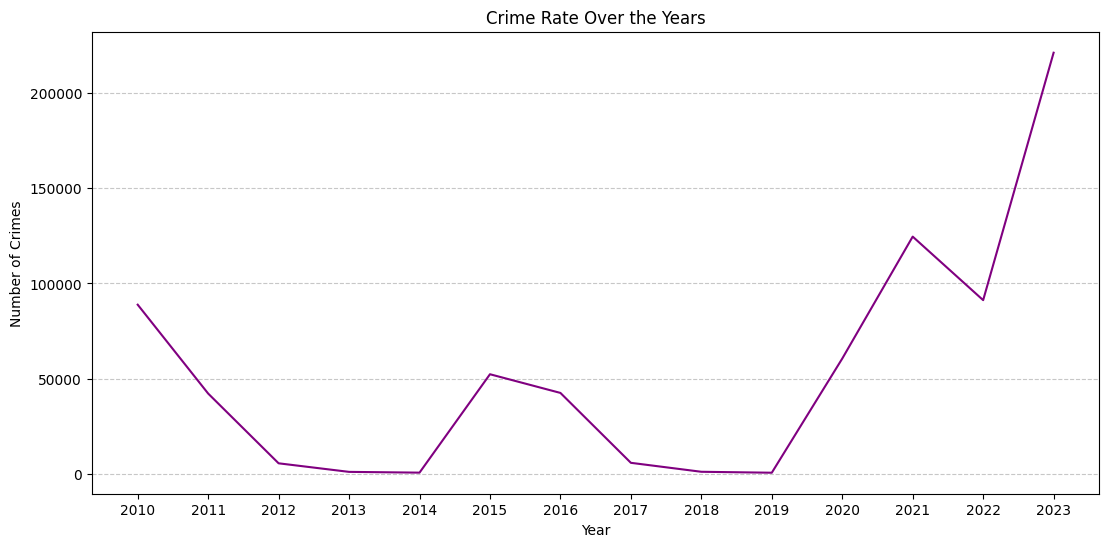

In [111]:
year_counts = crimes['Year'].value_counts().sort_index()

plt.figure(figsize=(13, 6))
sns.lineplot(x=year_counts.index, y=year_counts.values, color='purple')
plt.title("Crime Rate Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(year_counts.index)

plt.show()

The plot shows that the crime rate has been going up since 2019. There was a small drop in 2022, but overall, it's been on the rise. This suggests that there might be various factors at play in shaping the crime trends during this time.

**2. How has the overall monthly crime rate in Los Angeles changed?**

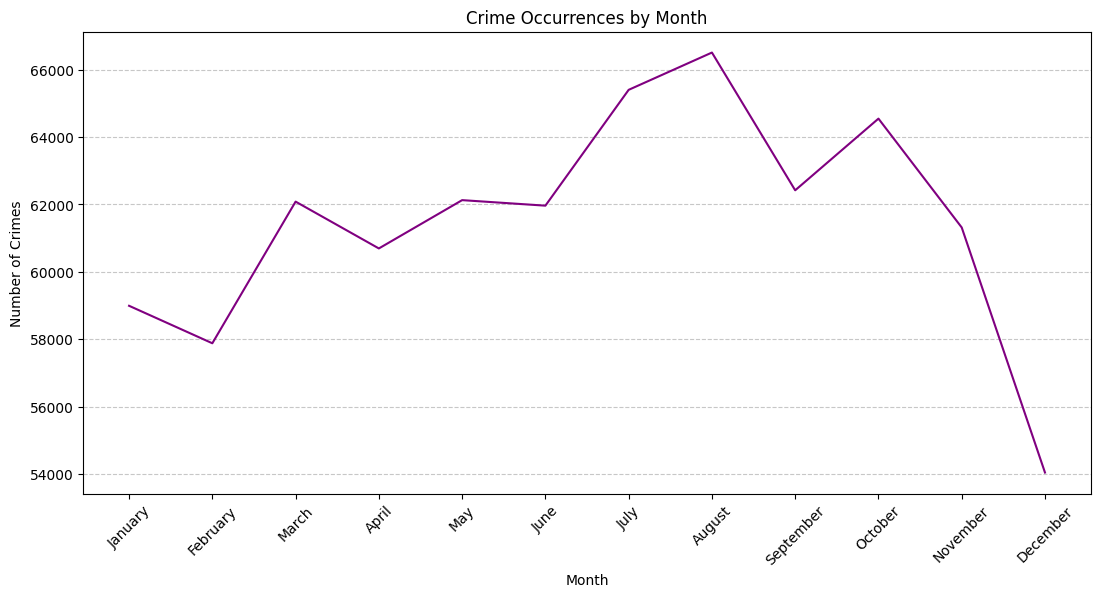

In [112]:

# Assuming 'crimes' DataFrame is defined and 'Month' column exists

month_counts = crimes['Month'].value_counts().sort_index()

# Mapping month numbers to month names
month_names = [calendar.month_name[i] for i in month_counts.index]

plt.figure(figsize=(13, 6))
sns.lineplot(x=month_names, y=month_counts.values, color='purple')
plt.title("Crime Occurrences by Month")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed

plt.show()


July and August stand out as peak months for criminal activity in Los Angeles, while December consistently registers the lowest crime rates.

**3. How is the overall crime rate in Los Angeles changed by hour of the day?**

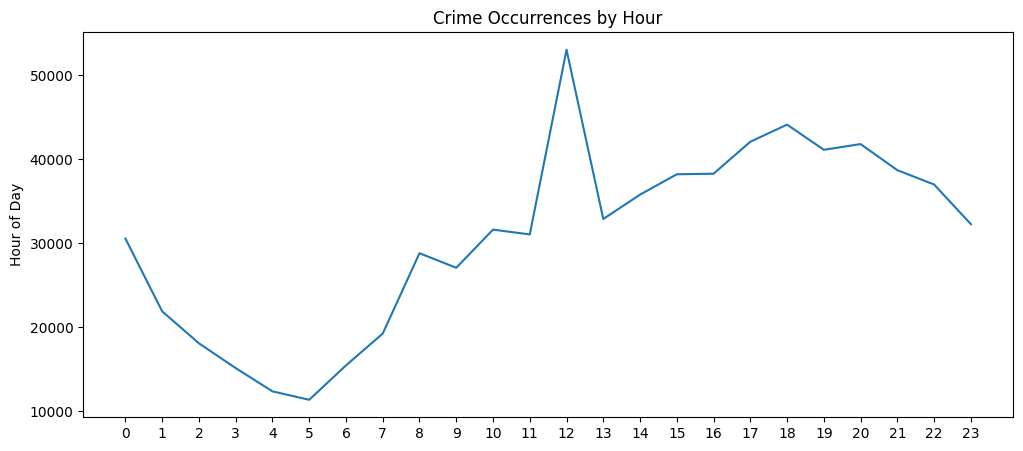

In [113]:
crime_by_hour = crimes['Hour of Day'].value_counts().sort_index()

plt.figure(figsize=(12, 5))
sns.lineplot(data=crime_by_hour)
plt.title('Crime Occurrences by Hour')
plt.xticks(crime_by_hour.index)
plt.show()

In Los Angeles, early mornings experience lower crime rates, gradually increasing as the day unfolds until midnight. Interestingly, the peak of criminal activity is observed around 12 pm, showcasing a distinctive pattern of crime fluctuation throughout the day.

**4. Which geographic areas have the highest crime rates?**

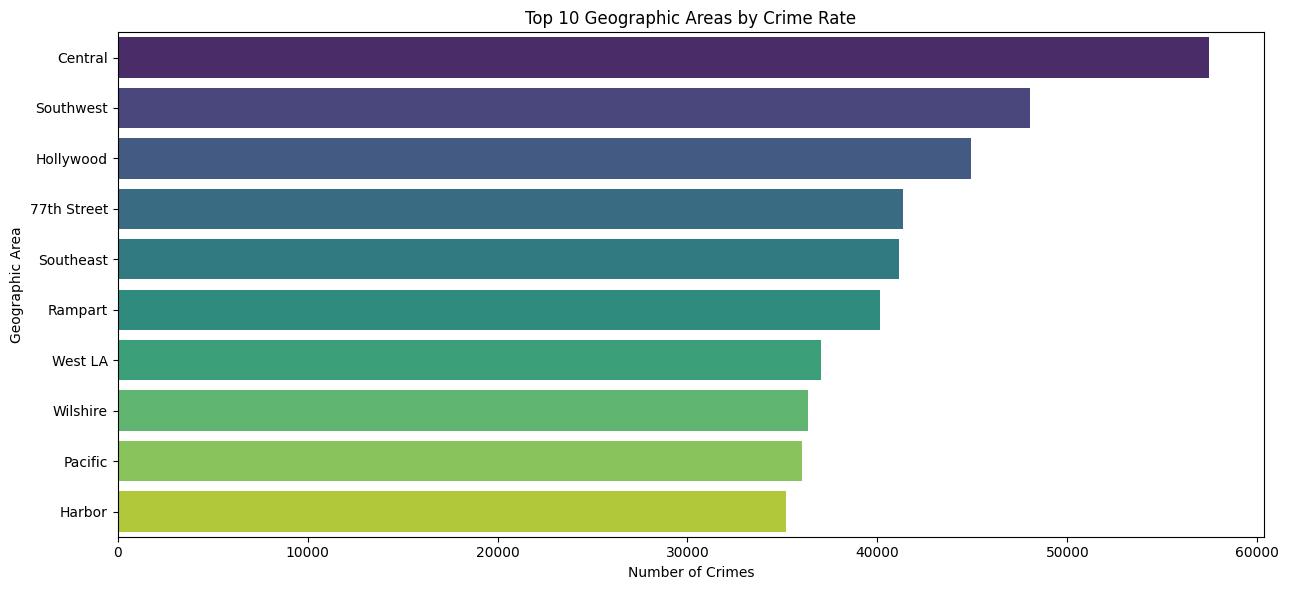

In [137]:
# Group by Area Name and count occurrences of crimes in each area
top_10_crime_by_area = crimes['AREA NAME'].value_counts().head(10)

# Sort areas by crime rates in ascending order
sorted_areas = top_10_crime_by_area.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(13, 6))
sns.barplot(x=sorted_areas.values, y=sorted_areas.index,  hue=sorted_areas.index, palette='viridis')
plt.title('Top 10 Geographic Areas by Crime Rate')
plt.xlabel('Number of Crimes')
plt.ylabel('Geographic Area')
plt.tight_layout()
plt.show()

**5. Which geographic areas (1-21) have the lowest crime rates?**

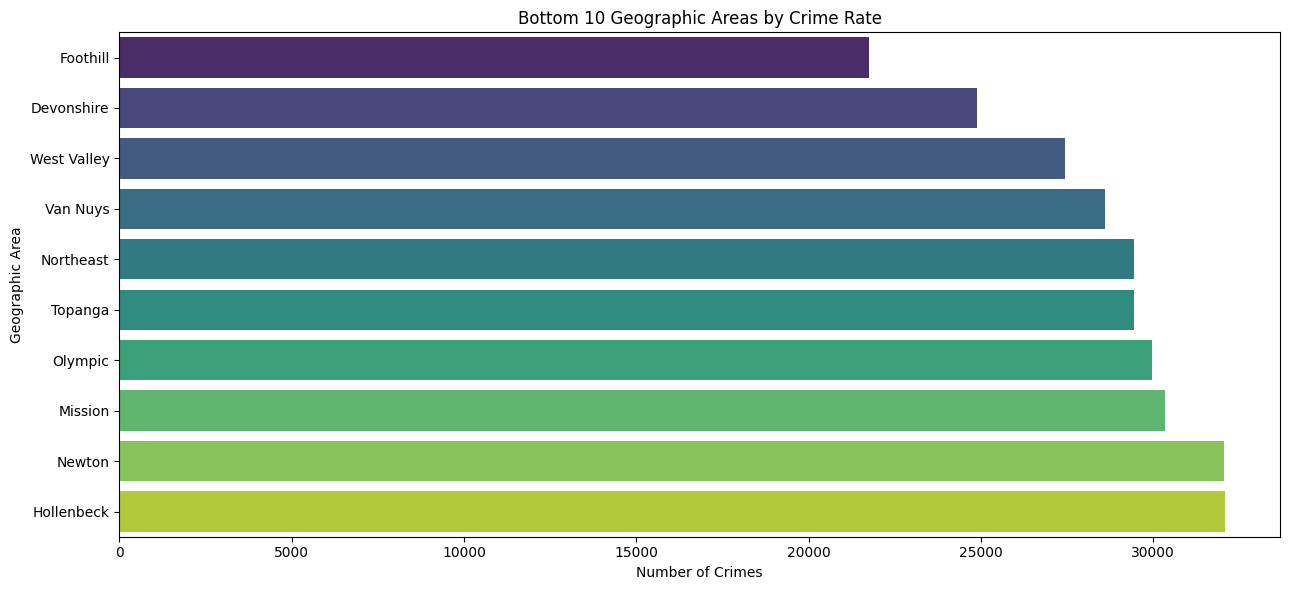

In [138]:
# Group by Area Name and count occurrences of crimes in each area
bottom_10_crime_by_area = crimes['AREA NAME'].value_counts().tail(10)

# Sort areas by crime rates in ascending order
sorted_areas = bottom_10_crime_by_area.sort_values()

# Plotting
plt.figure(figsize=(13, 6))
sns.barplot(x=sorted_areas.values, y=sorted_areas.index,  hue=sorted_areas.index, palette='viridis')
plt.title('Bottom 10 Geographic Areas by Crime Rate')
plt.xlabel('Number of Crimes')
plt.ylabel('Geographic Area')
plt.tight_layout()
plt.show()

Crime rates are higher in Central and West areas of Los Angeles, while Foothill and Devonshire areas have lower incidents.

**6. identify specific neighborhoods or sites within LA with higher crime concentrations?**


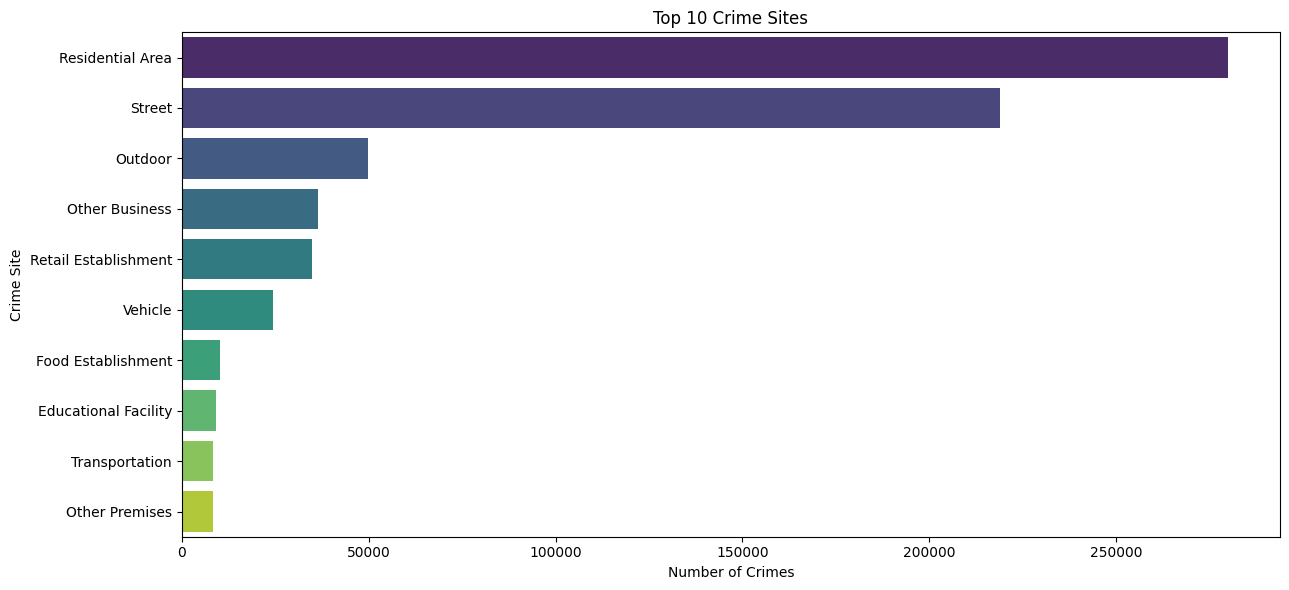

In [139]:
top_10_crime_by_site = crimes['Premise Category'].value_counts().head(10)

# Sort areas by crime rates in ascending order
sorted_areas = top_10_crime_by_site.sort_values(ascending = False)

# Plotting
plt.figure(figsize=(13, 6))
sns.barplot(x=sorted_areas.values, y=sorted_areas.index,  hue=sorted_areas.index, palette='viridis')
plt.title('Top 10 Crime Sites')
plt.xlabel('Number of Crimes')
plt.ylabel('Crime Site')
plt.tight_layout()
plt.show()

The highest crime incidents occur in residential areas and streets

**7.  What are the most common types of crimes reported in Los Angeles?**

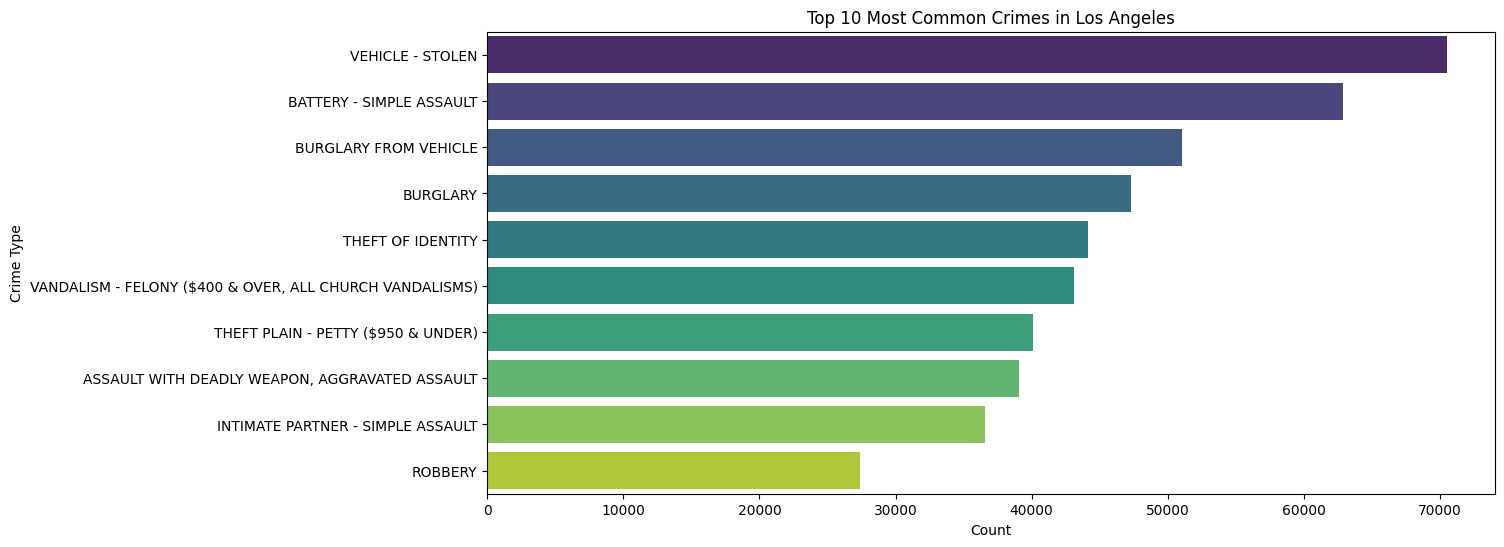

In [140]:

# Count the most common types of crimes
common_crimes = crimes['Crm Cd Desc'].value_counts().head(10)

# Visualize the most common types of crimes
plt.figure(figsize=(13, 6))
sns.barplot(x=common_crimes, y=common_crimes.index,  hue=common_crimes.index, palette='viridis')
plt.title('Top 10 Most Common Crimes in Los Angeles')
plt.xlabel('Count')
plt.ylabel('Crime Type')
plt.show()

The most reported crimes in the city of Los Angeles are stolen vehicles, simple assaults (battery), and burglary from vehicles.

**8. What is the peak time for different types of crimes**

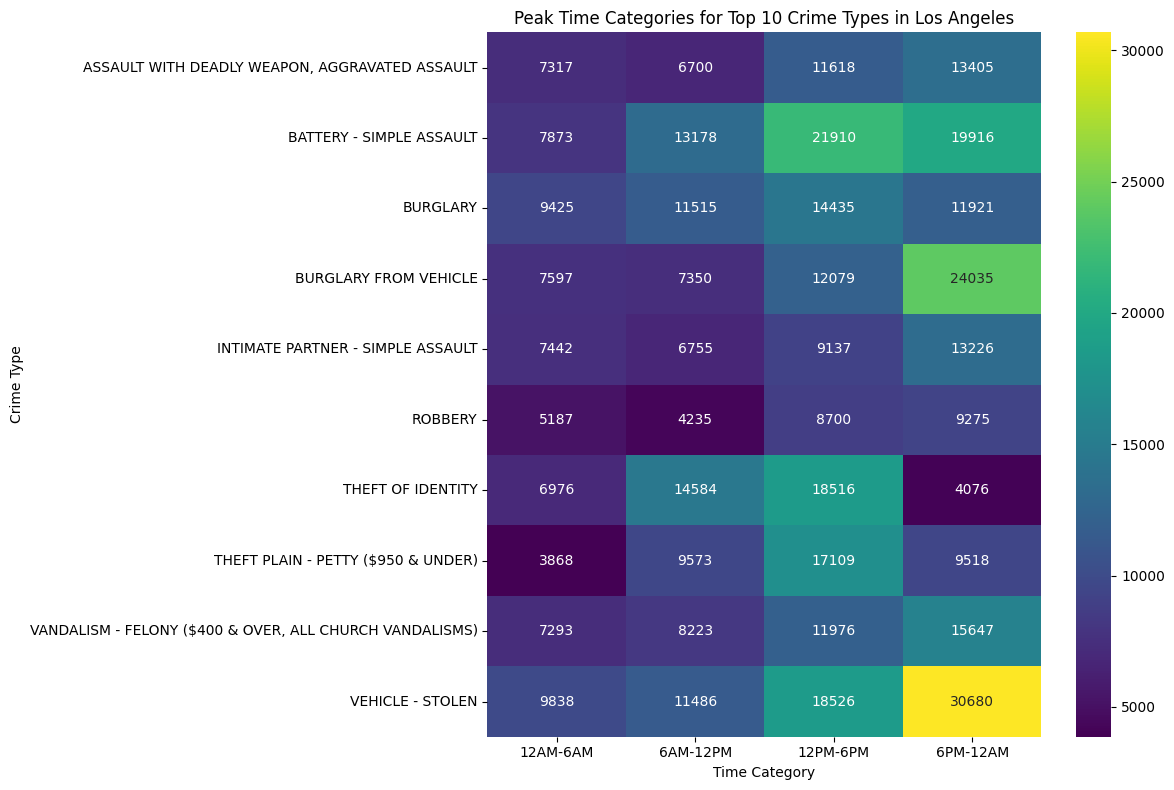

In [120]:

from pandas.api.types import CategoricalDtype

# Function to categorize hours into broader time categories
def categorize_hour(hour):
    if 0 <= hour < 6:
        return '12AM-6AM'
    elif 6 <= hour < 12:
        return '6AM-12PM'
    elif 12 <= hour < 18:
        return '12PM-6PM'
    else:
        return '6PM-12AM'

# Apply the categorization function to create a new column for time categories
crimes['Time Category'] = crimes['Hour of Day'].apply(categorize_hour)

# Define the order of time categories
time_categories_order = ['12AM-6AM', '6AM-12PM', '12PM-6PM', '6PM-12AM']

# Convert 'Time Category' to ordered categorical type with defined order
crimes['Time Category'] = pd.Categorical(crimes['Time Category'], categories=time_categories_order, ordered=True)

# Filter data for the top 10 crime types
top_10_crime_types = crimes['Crm Cd Desc'].value_counts().head(10).index.tolist()
data_for_analysis = crimes[crimes['Crm Cd Desc'].isin(top_10_crime_types)]

# Pivot table to count occurrences of each crime type by time category
pivot_data = data_for_analysis.pivot_table(index='Crm Cd Desc', columns='Time Category', aggfunc='size', fill_value=0)

# Plotting a heatmap to visualize peak hours (time categories) for each crime type
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, cmap='viridis', annot=True, fmt='d')
plt.title('Peak Time Categories for Top 10 Crime Types in Los Angeles')
plt.xlabel('Time Category')
plt.ylabel('Crime Type')
plt.tight_layout()
plt.show()


- Vehicle theft is more likely to occur between 6pm to 12am.
- Simple assault (battery) occurs most frequently from the afternoon until evening, specifically between 12 pm and 12 am.



**9. Is there a correlation between the type of crime and the location where it occurs?**


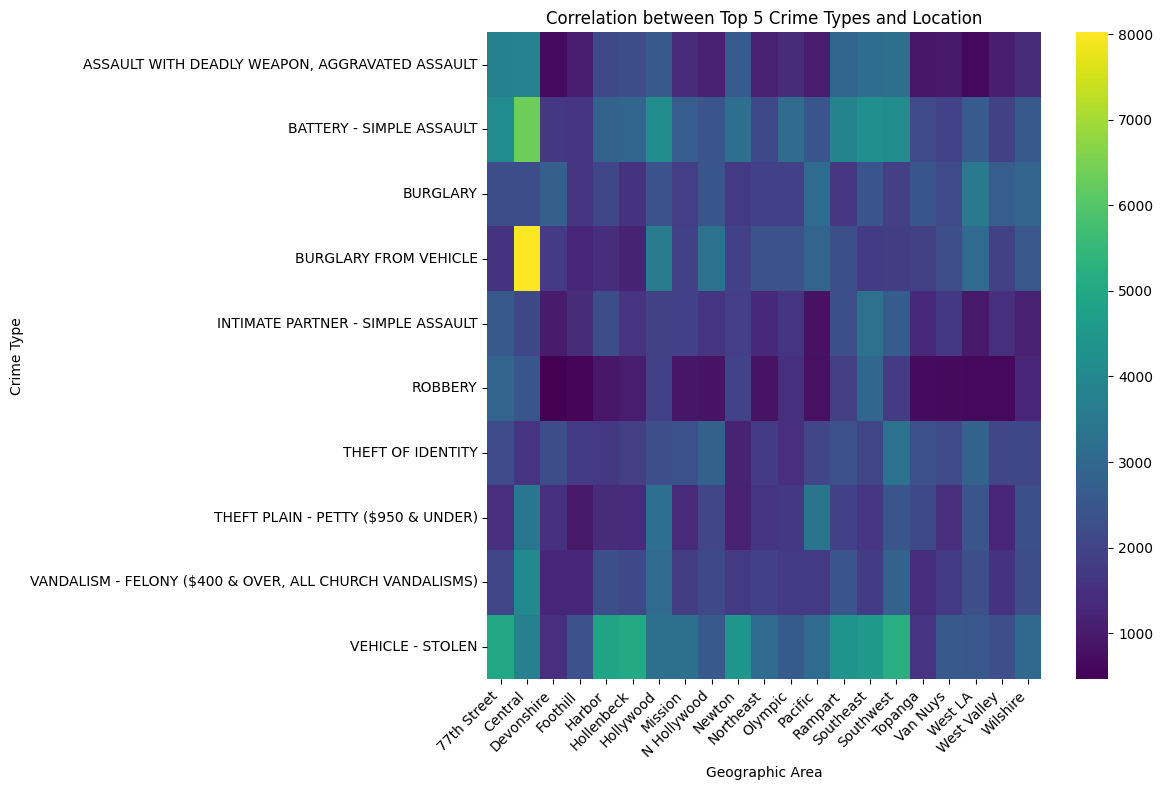

In [121]:
# Get the top 5 most common crime types
top_5_crime_types = crimes['Crm Cd Desc'].value_counts().head(5).index.tolist()

# Filter the data for the top 5 crime types
filtered_data = crimes[crimes['Crm Cd Desc'].isin(top_10_crime_types)]

# Group filtered data by 'Crm Cd Desc' (crime type) and 'AREA NAME' (location), and count occurrences
crime_location_counts_top_5 = filtered_data.groupby(['Crm Cd Desc', 'AREA NAME']).size().unstack(fill_value=0)

# Plotting heatmap to visualize the correlation for top 5 crime types
plt.figure(figsize=(12, 8))
sns.heatmap(crime_location_counts_top_5, cmap='viridis')

plt.title('Correlation between Top 5 Crime Types and Location')
plt.xlabel('Geographic Area')
plt.ylabel('Crime Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Central area has the highest reported case of Simple assualt (battery) and stolen vehicle

**10. Are there seasonal variations in certain types of crime?**

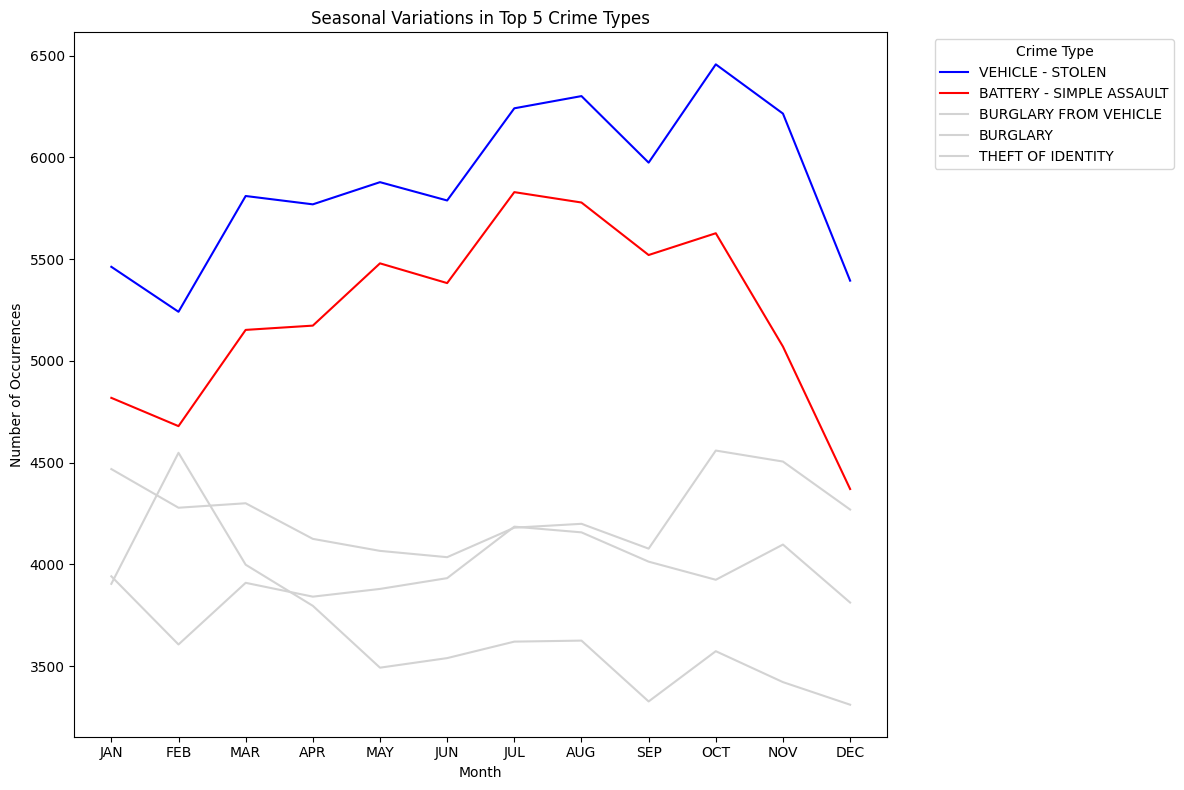

In [122]:
top_5_crime_types = crimes['Crm Cd Desc'].value_counts().head(5).index.tolist()

crime_month_counts = crimes.groupby(['Crm Cd Desc', 'Month']).size().unstack(fill_value=0)

custom_colors = {
    'VEHICLE - STOLEN': 'blue',
    'BATTERY - SIMPLE ASSAULT': 'red'
}

# Plotting seasonal variations for the top 5 crime types
plt.figure(figsize=(12, 8))
for crime_type in top_5_crime_types:
    if crime_type in crime_month_counts.index:  # Check if the crime type exists in the data
        color = custom_colors.get(crime_type, 'lightgray')
        sns.lineplot(data=crime_month_counts.loc[crime_type], label=crime_type, color=color)

plt.title('Seasonal Variations in Top 5 Crime Types')
plt.xlabel('Month')
plt.ylabel('Number of Occurrences')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(1, 13), ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'])
plt.tight_layout()
plt.show()

Among the top 5 reported crime types, simple assault (battery) and stolen vehicle exhibit similar monthly trends in crime rates.

**11. What is the gender distribution of crime victims in Los Angeles**

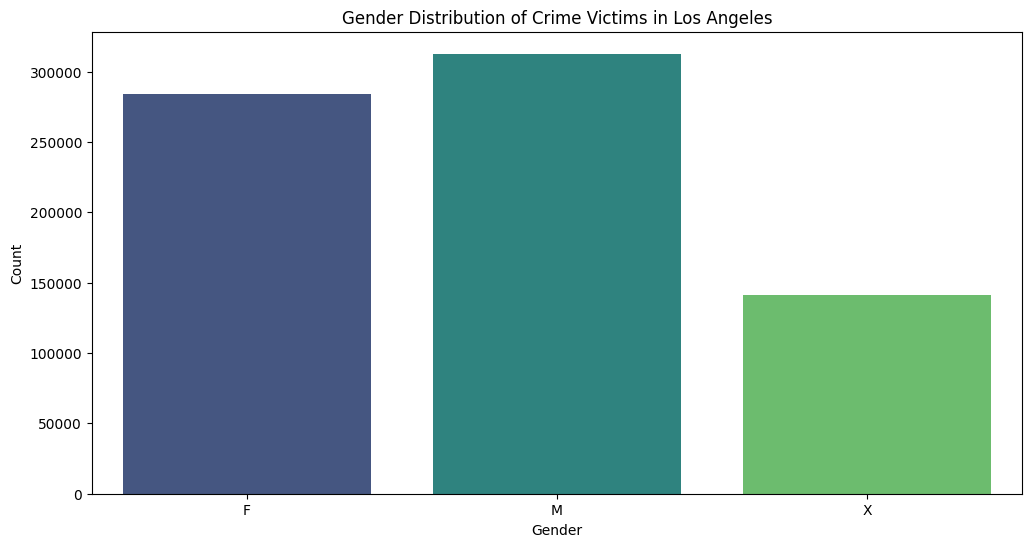

In [142]:
# Visualize the Gender Distribution of Crime Victims
plt.figure(figsize=(12, 6))
sns.countplot(data=crimes, x='Vict Sex', hue= 'Vict Sex', palette='viridis')
plt.title("Gender Distribution of Crime Victims in Los Angeles")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

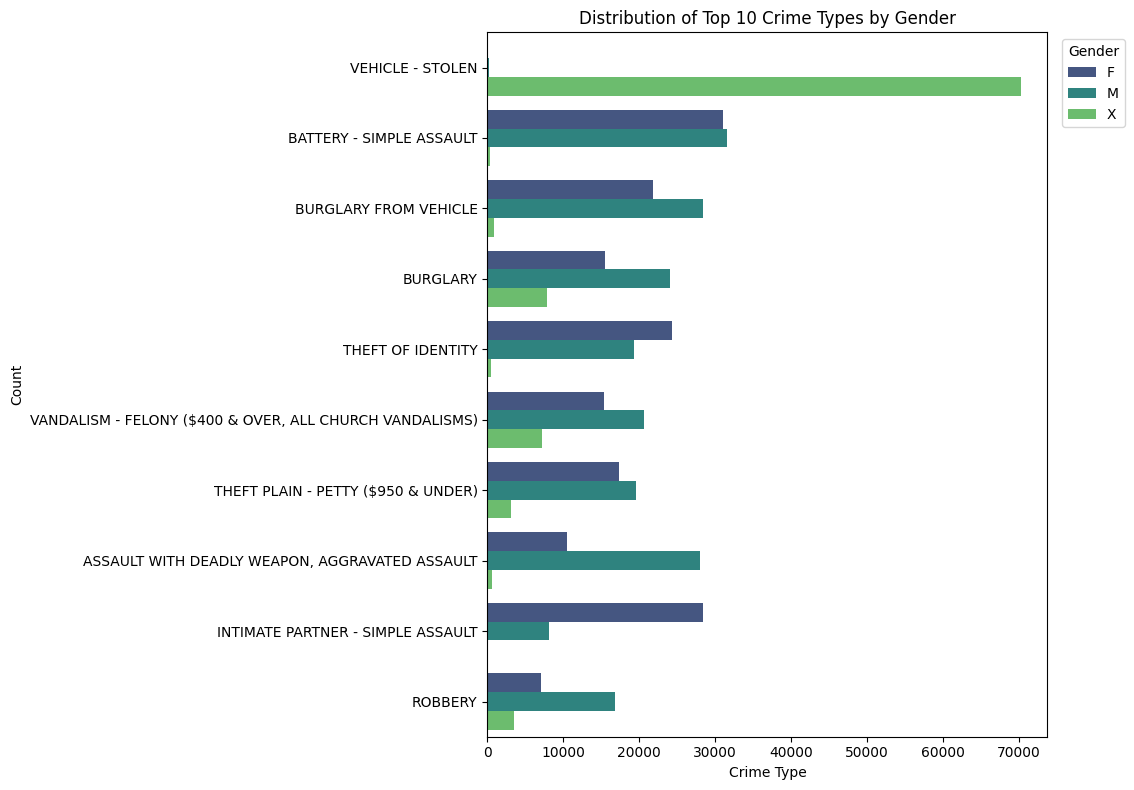

In [124]:

# Get the top 10 most common crime types
top_10_crime_types = crimes['Crm Cd Desc'].value_counts().head(10).index.tolist()

# Filter data for the top 10 crime types
top_10_crimes_data = crimes[crimes['Crm Cd Desc'].isin(top_10_crime_types)]

# Plotting the distribution of the top 10 crime types by gender
plt.figure(figsize=(12, 8))
sns.countplot(data=top_10_crimes_data, y='Crm Cd Desc', hue='Vict Sex', order=top_10_crime_types, palette='viridis')
plt.title('Distribution of Top 10 Crime Types by Gender')
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.legend(title='Gender', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()


Simple assault (battery) shows a relatively equal distribution of victims across genders, with Theft Plain - Petty ($950 & Under) following a similar pattern.

**12. What is the ethnic distribution of Crime Victims in Los Angeles**

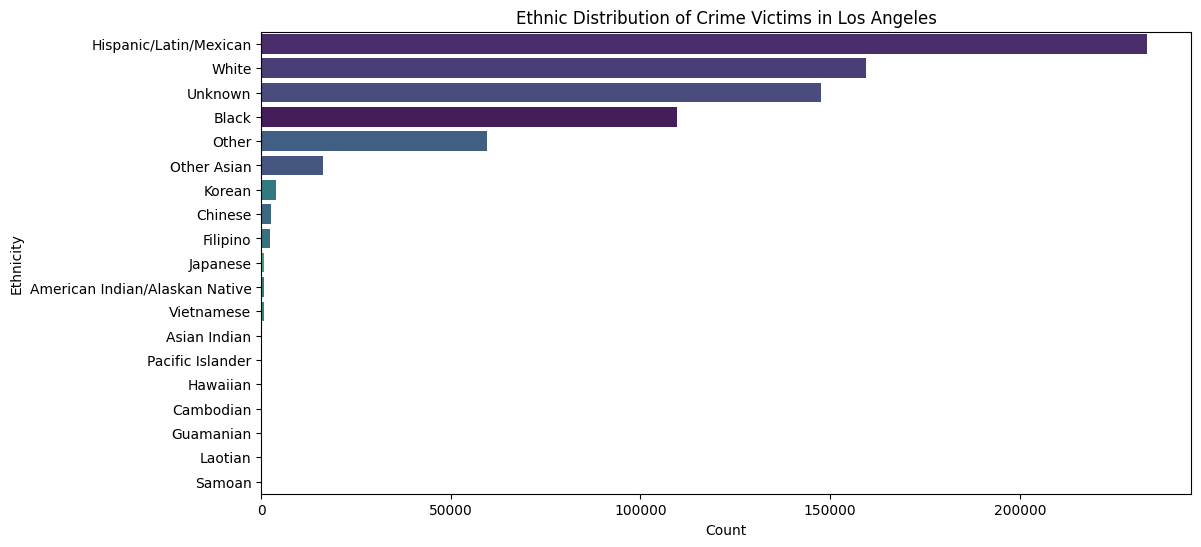

In [144]:
# Calculate value counts for 'Vict Descent Description'
ethnicity_counts = crimes['Vict Descent Description'].value_counts()

# Sort the ethnicities based on counts in descending order
sorted_ethnicities = ethnicity_counts.index.tolist()

plt.figure(figsize=(12, 6))
sns.countplot(data=crimes, y='Vict Descent Description', hue='Vict Descent Description', order=sorted_ethnicities, palette='viridis')
plt.title("Ethnic Distribution of Crime Victims in Los Angeles")
plt.xlabel("Count")
plt.ylabel("Ethnicity")
plt.show()

**13. Do certain crimes have specific patterns regarding victim demographics?**

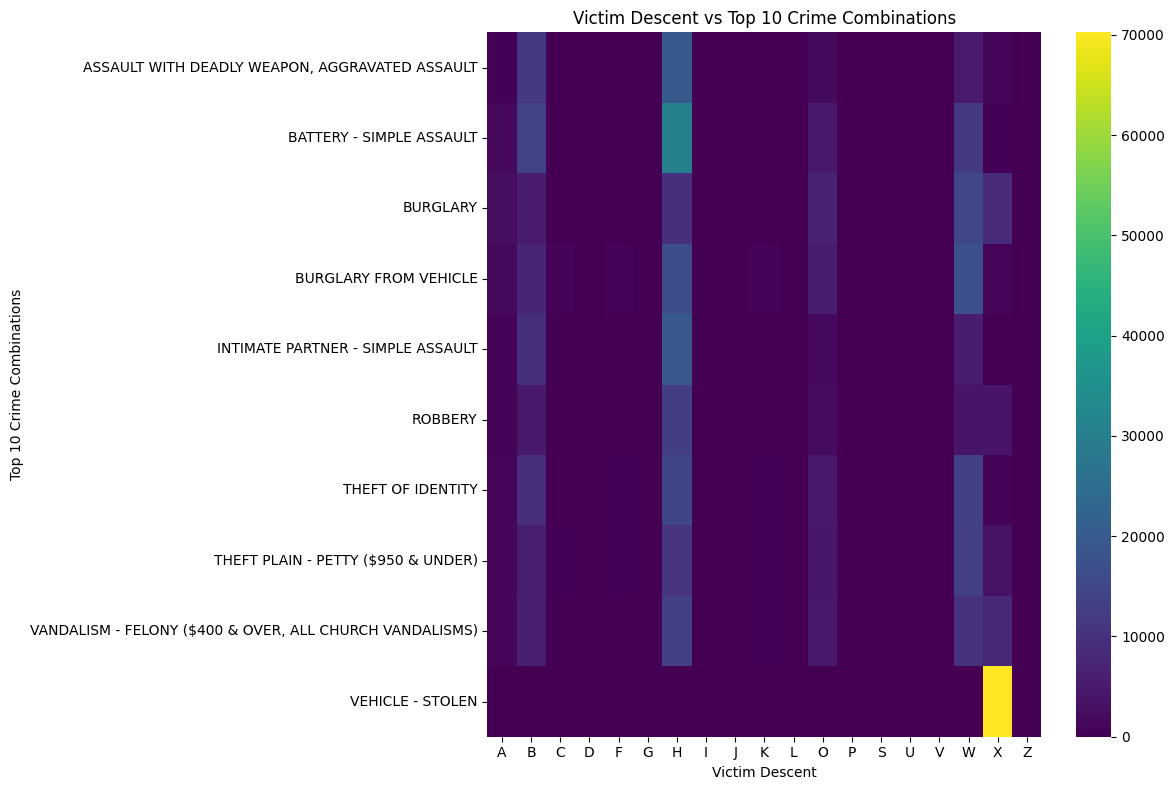

In [126]:

# Filtered data for analysis with relevant columns
data_for_analysis = crimes[['Crm Cd Desc', 'Vict Descent']]

# Count occurrences of each crime type
crime_counts = data_for_analysis['Crm Cd Desc'].value_counts()

# Select the top 10 crime types based on occurrence frequency
top_10_crimes = crime_counts.head(10).index.tolist()

# Filter the data to include only the top 10 crime types
filtered_data = data_for_analysis[data_for_analysis['Crm Cd Desc'].isin(top_10_crimes)]

# Grouping data by Crime Types and Victim Descent and counting occurrences
grouped_data = filtered_data.groupby(['Crm Cd Desc', 'Vict Descent']).size().reset_index(name='Count')

# Create a pivot table to count occurrences of each victim descent for each crime combination
pivot_data = grouped_data.pivot_table(index='Crm Cd Desc', columns='Vict Descent', values='Count', aggfunc='sum', fill_value=0)

# Create a heatmap to visualize the relationships between combinations of crimes and victim descent
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, cmap='viridis')
plt.title('Victim Descent vs Top 10 Crime Combinations')
plt.xlabel('Victim Descent')
plt.ylabel('Top 10 Crime Combinations')
plt.tight_layout()
plt.show()



Hispanic/Latin/Mexican, Black, and White are the top ethnicities with crime victims


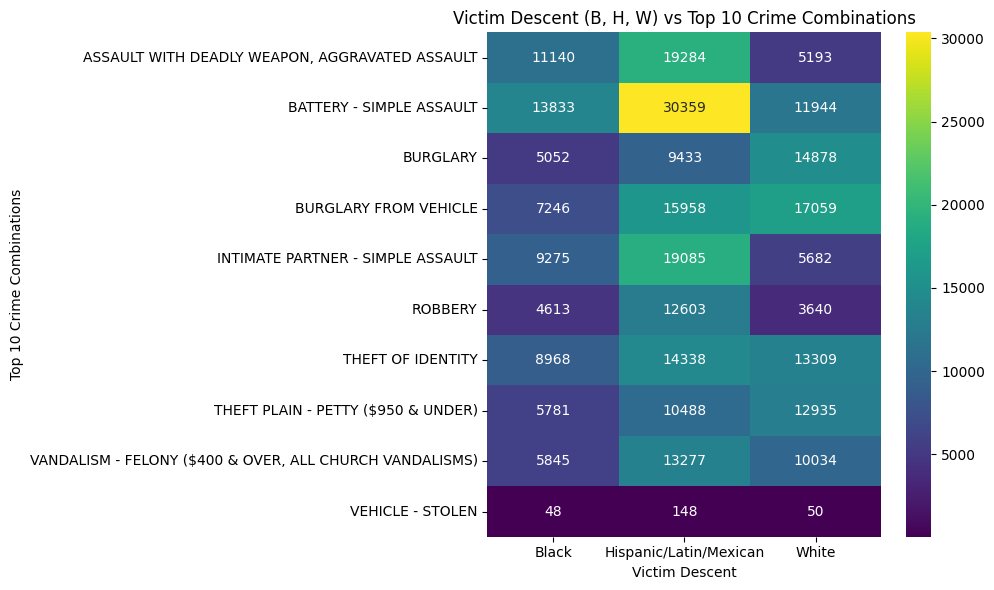

In [127]:

# Filtered data for analysis with relevant columns
data_for_analysis = crimes[['Crm Cd Desc', 'Vict Descent Description']]

# Count occurrences of each crime type
crime_counts = data_for_analysis['Crm Cd Desc'].value_counts()

# Select the top 10 crime types based on occurrence frequency
top_10_crimes = crime_counts.head(10).index.tolist()

# Filter the data to include only the top 10 crime types
filtered_data = data_for_analysis[data_for_analysis['Crm Cd Desc'].isin(top_10_crimes)]

# Filter victim descent categories 'B', 'H', and 'W'
filtered_data = filtered_data[filtered_data['Vict Descent Description'].isin(['Black', 'Hispanic/Latin/Mexican', 'White'])]

# Grouping data by Crime Types and Victim Descent and counting occurrences
grouped_data = filtered_data.groupby(['Crm Cd Desc', 'Vict Descent Description']).size().reset_index(name='Count')

# Create a pivot table to count occurrences of each victim descent for each crime combination
pivot_data = grouped_data.pivot_table(index='Crm Cd Desc', columns='Vict Descent Description', values='Count', aggfunc='sum', fill_value=0)

# Create a heatmap to visualize the relationships between combinations of crimes and victim descent for categories 'B', 'H', and 'W'
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data, cmap='viridis', annot=True, fmt='d')
plt.title('Victim Descent (B, H, W) vs Top 10 Crime Combinations')
plt.xlabel('Victim Descent')
plt.ylabel('Top 10 Crime Combinations')
plt.tight_layout()
plt.show()


The Hispanic/Latin/Mexican demographic appears to have a higher incidence of crimes among the top 10, with simple assault (battery) being the most prevalent among them

**14. What is the distribution of Victim age across Los Angeles?**

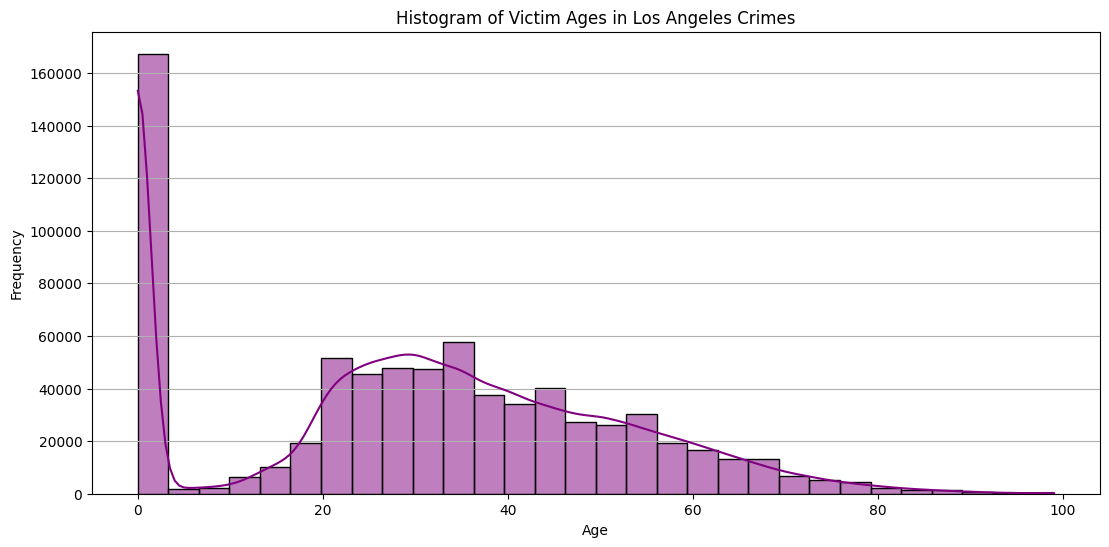

In [128]:

# Plotting the histogram of victim ages
plt.figure(figsize=(13, 6))
sns.histplot(data=crimes, x='Vict Age', bins=30, kde=True, color='purple')
plt.title('Histogram of Victim Ages in Los Angeles Crimes')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y')  # Add gridlines on the y-axis for better readability
plt.show()


From the visualisation, it became apparent that the most frequently recorded victim age is listed as '0' with a notable count of over 160,000 instances. This may suggest instances where the victim's age was either unspecified or missing in the records

In [129]:
# Count the most frequent victim ages
top_ages = crimes['Vict Age'].value_counts().head(5)

# Display the results
top_ages

0.0     166361
30.0     16427
29.0     16170
28.0     15957
27.0     15726
Name: Vict Age, dtype: int64

Excluding the '0' group, the top reported victim ages are 30, 29, 28, and 27.

**15. What is the distribution of crime type across victim age**

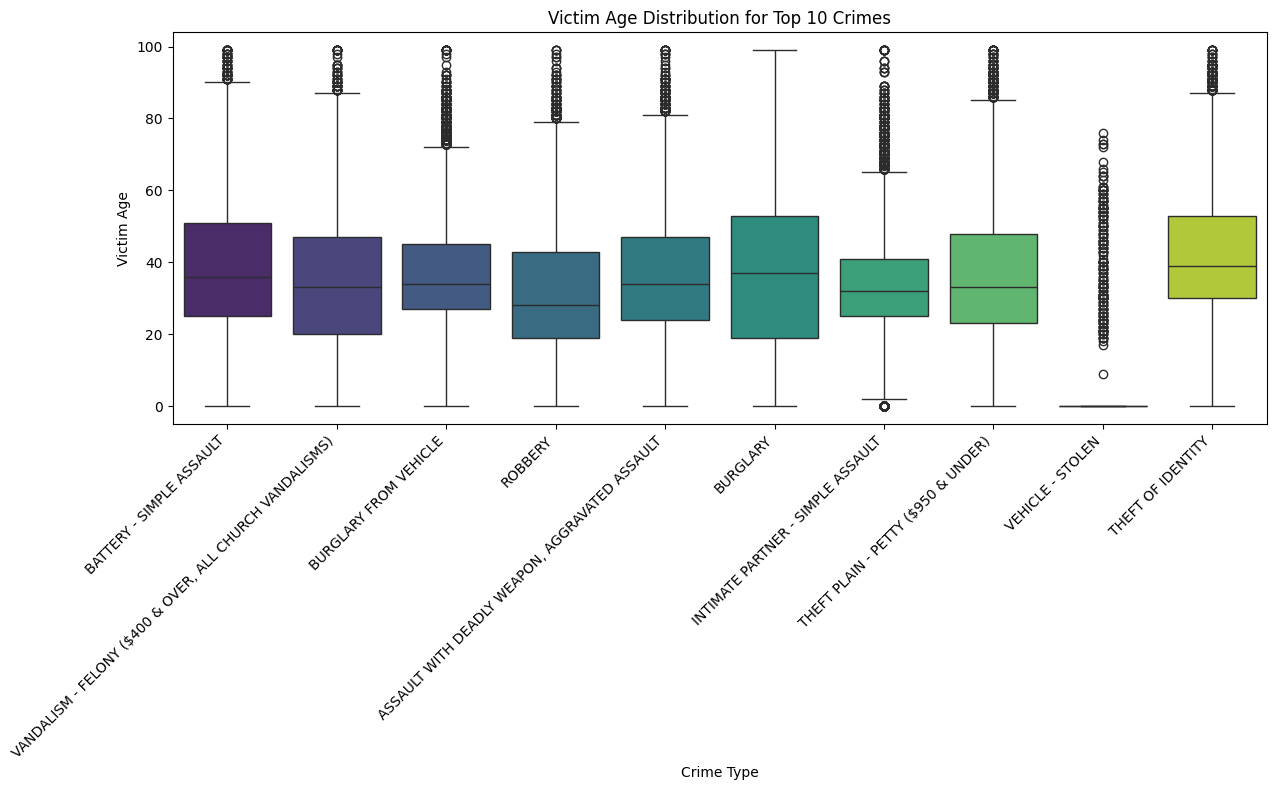

In [145]:

# Get the top 10 most common crime types
top_10_crime_types = crimes['Crm Cd Desc'].value_counts().head(10).index.tolist()

# Filter data for the top 10 crime types
data_for_plot = crimes[crimes['Crm Cd Desc'].isin(top_10_crime_types)][['Vict Age', 'Crm Cd Desc']]

# Plotting box plot for victim age distribution across the top 10 crimes
plt.figure(figsize=(13, 8))
sns.boxplot(data=data_for_plot, x='Crm Cd Desc', y='Vict Age', hue='Crm Cd Desc', palette='viridis')
plt.title('Victim Age Distribution for Top 10 Crimes')
plt.xlabel('Crime Type')
plt.ylabel('Victim Age')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


**16. What are the most common types of crime weapons used in Los Angeles?**

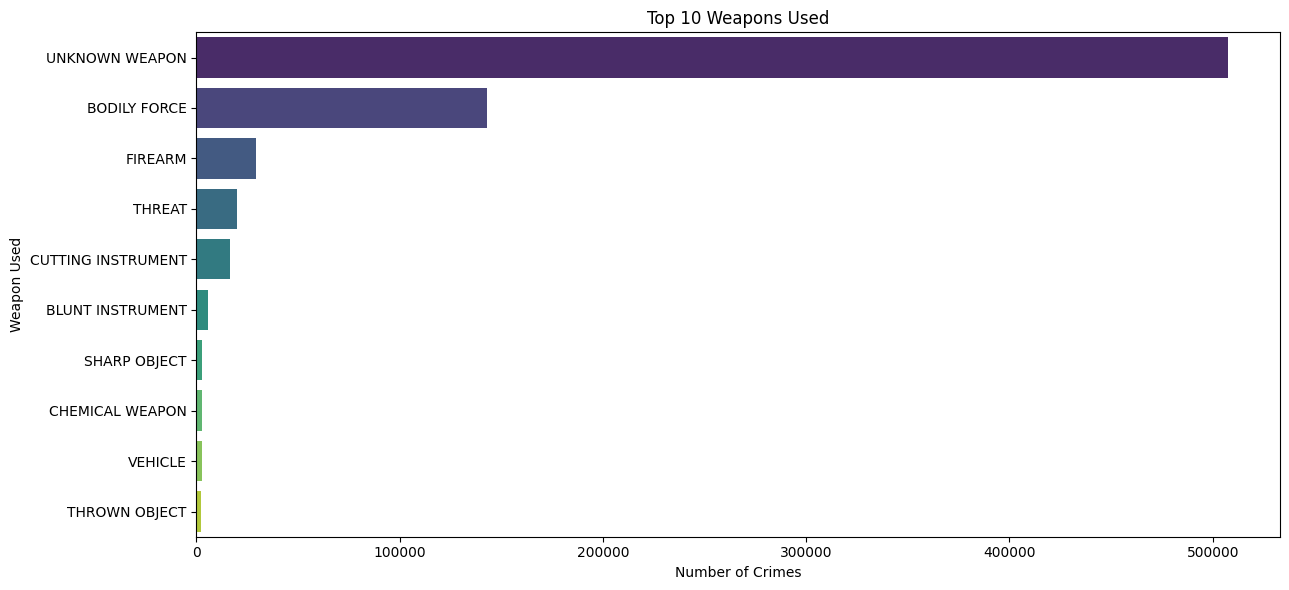

In [131]:
top_10_weapons = crimes['Weapon Category'].value_counts().head(10)

# Sort areas by crime rates in ascending order
sorted_areas = top_10_weapons.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(13, 6))
sns.barplot(x=sorted_areas.values, y=sorted_areas.index, palette='viridis', hue=sorted_areas.index, dodge=False)
plt.title('Top 10 Weapons Used')
plt.xlabel('Number of Crimes')
plt.ylabel('Weapon Used')
plt.tight_layout()
plt.show()


**17. What types of weapons are most commonly used in different types of crimes?**

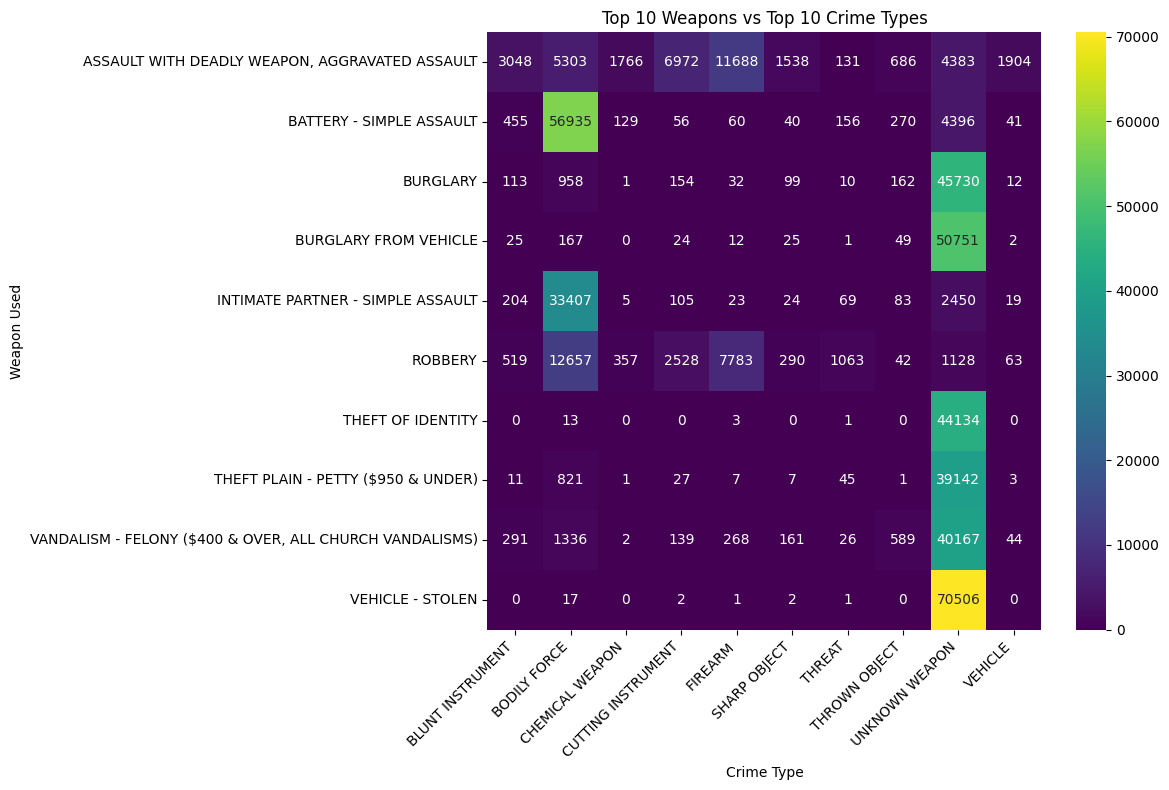

In [132]:

# Selecting columns for analysis
data_for_analysis = crimes[['Crm Cd Desc', 'Weapon Category']]

# Filter data for the top 10 crime types and top 10 weapons
top_10_crime_types = crimes['Crm Cd Desc'].value_counts().head(10).index.tolist()
top_10_weapons = crimes['Weapon Category'].value_counts().head(10).index.tolist()

filtered_data = data_for_analysis[
    data_for_analysis['Crm Cd Desc'].isin(top_10_crime_types) &
    data_for_analysis['Weapon Category'].isin(top_10_weapons)
]

# Grouping data by Crime Type and Weapon Type and counting occurrences
grouped_data = filtered_data.groupby(['Crm Cd Desc', 'Weapon Category']).size().reset_index(name='Count')

# Pivot the data for easier plotting
pivot_data = grouped_data.pivot(index='Crm Cd Desc', columns='Weapon Category', values='Count').fillna(0)

# Create a heatmap with annotations (displaying count values)
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(pivot_data, cmap='viridis', annot=True, fmt='g')  # 'fmt' sets the format of the annotations

plt.title('Top 10 Weapons vs Top 10 Crime Types')
plt.xlabel('Crime Type')
plt.ylabel('Weapon Used')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**18. Are certain types of locations or premises more prone to specific types of crimes?**

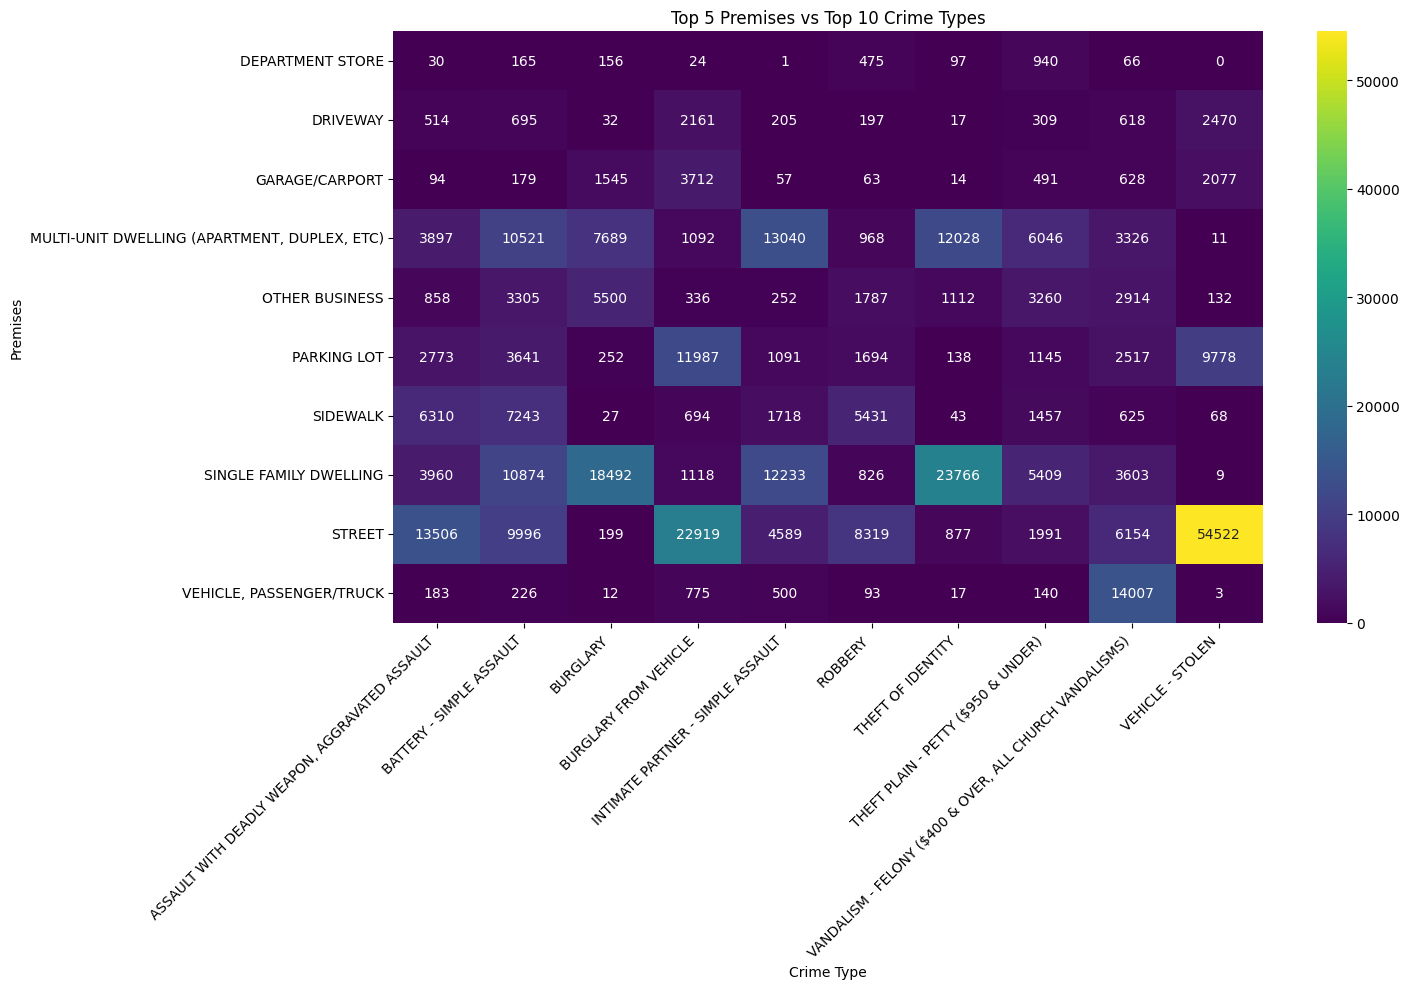

In [133]:

# Selecting columns for analysis
data_for_analysis = crimes[['Premis Desc', 'Crm Cd Desc']]

# Filter data for the top 5 premises and top 10 crime types
top_5_premises = crimes['Premis Desc'].value_counts().head(10).index.tolist()
top_10_crime_types = crimes['Crm Cd Desc'].value_counts().head(10).index.tolist()

filtered_data = data_for_analysis[
    data_for_analysis['Premis Desc'].isin(top_5_premises) &
    data_for_analysis['Crm Cd Desc'].isin(top_10_crime_types)
]

# Grouping data by Premis Desc and Crm Cd Desc and counting occurrences
grouped_data = filtered_data.groupby(['Premis Desc', 'Crm Cd Desc']).size().reset_index(name='Count')

# Pivot the data for easier plotting
pivot_data = grouped_data.pivot(index='Premis Desc', columns='Crm Cd Desc', values='Count').fillna(0)

# Create a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(pivot_data, cmap='viridis', annot=True, fmt='g')
plt.title('Top 5 Premises vs Top 10 Crime Types')
plt.xlabel('Crime Type')
plt.ylabel('Premises')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


From the analysis,
- Vechicles are more likely to be stolen from streets
- Identity theft occur majorly in single and multi-unit dwelling. Same can be said about simple assualt (intimate partner).
- Simple assualt (battery) crime has more spreadout crime premises among other crimes.

**19. What is the distribution of crimes among offence type?**

In [134]:
crimes['Status Desc'].value_counts()

Invest Cont     598274
Adult Other      73133
Adult Arrest     61941
Juv Arrest        3194
Juv Other         1397
UNK                  8
Name: Status Desc, dtype: int64

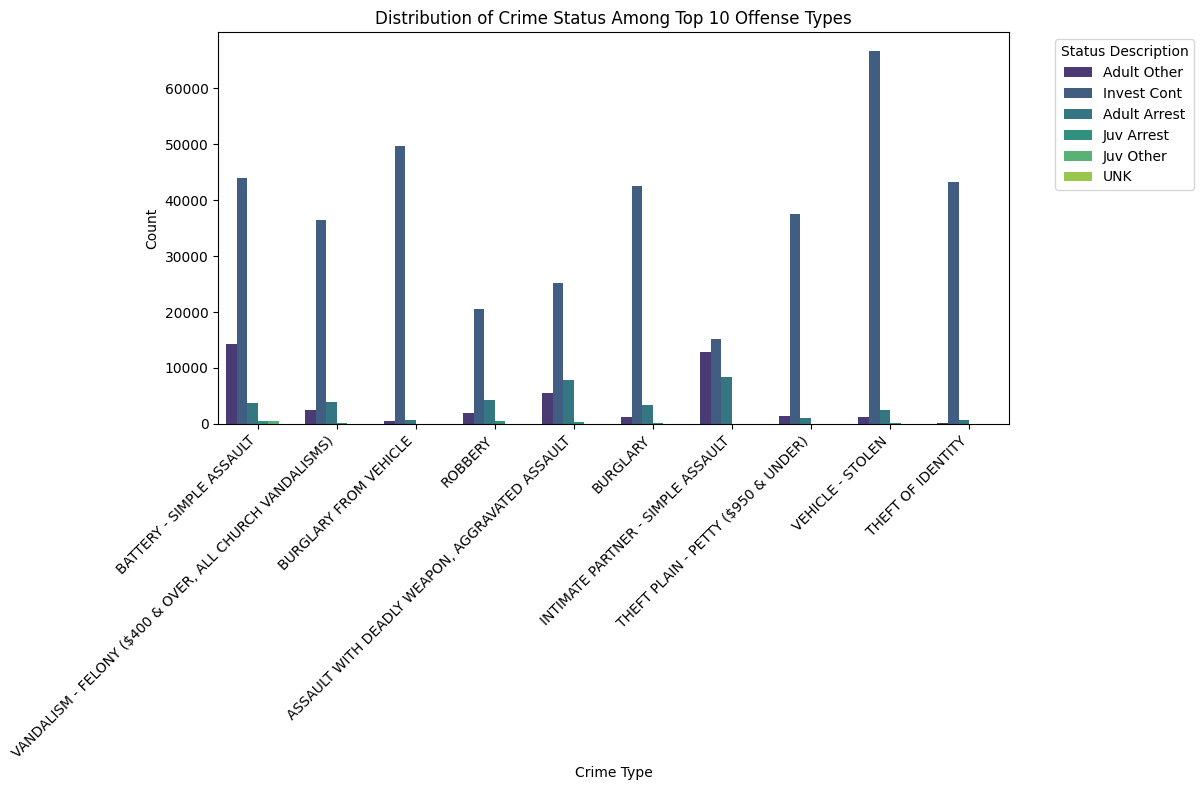

In [135]:

# Get the top 10 crime types
top_10_crime_types = crimes['Crm Cd Desc'].value_counts().head(10).index.tolist()

# Filtered data for analysis with only top 10 crime types
data_for_analysis = crimes[crimes['Crm Cd Desc'].isin(top_10_crime_types)][['Crm Cd Desc', 'Status Desc']]

# Plotting using Seaborn's countplot
plt.figure(figsize=(12, 8))
sns.countplot(data=data_for_analysis, x='Crm Cd Desc', hue='Status Desc', palette='viridis')
plt.title('Distribution of Crime Status Among Top 10 Offense Types')
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.legend(title='Status Description', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Based on the analysis, the majority of crime cases in LA are still under investigation.

# **Conclusion**

Having conducted an in-depth analysis of the crime data of Los Angeles, here is a summary of key findings:
- Between 2010 and 2023, Los Angeles experienced 738,000 crime cases.
- Crime has been increasing since 2019, with a slight decrease in 2022.
- More crimes occur in the later evening in LA, but the peak is at 12 noon.
- The central area has the highest crime rate, while the foothill area has the lowest.
- The most common crime categories are theft, assault, battery, and vandalism.
- Stolen vehicles are the most frequently reported crimes in Los Angeles.
- Out of the 738,000 cases, about 600,000 are still under investigation.
- Bodily force is the most commonly used weapon in crimes, followed by firearms, excluding cases where the weapon is unknown.

